<a href="https://colab.research.google.com/github/nicolasero87/SongAttributes_1999-2019_Spotify_Nicolas_Roman/blob/main/60.%20Spotify%20Songs%20Atributes_Nicolas_Rom%C3%A1n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Final
#**Fundamento Ciencias de datos I**

---


###Alumno: Nicolas Román
####Comision 61600

###Prof.: [Daniela Blanco](https://www.linkedin.com/search/results/all/?fetchDeterministicClustersOnly=true&heroEntityKey=urn%3Ali%3Afsd_profile%3AACoAAAoe6OEBgIpmz1YRcTz1YQVco9CJWJU_OGM&keywords=daniela%20blanco&origin=RICH_QUERY_SUGGESTION&position=0&searchId=f3c7af4c-67ab-43b7-9a75-4bb8be324291&sid=1!Q&spellCorrectionEnabled=false)
###Tutor: [Edgardo Lucero](https://www.linkedin.com/in/edgardolucero/?original_referer=https%3A%2F%2Fwww%2Elinkedin%2Ecom%2F&originalSubdomain=ar)



#####Data Base:  [Spotify Song Attributes](https://www.kaggle.com/datasets/geomack/spotifyclassification?select=data.csv)

#####Septiembre 2024



#Consigna


---


##Para la Pre-Entrega
Identificar 1 dataset potencial con las siguientes características:
 i) al menos 2000 filas,
 ii) al menos 15 columnas.
Crearás un notebook que deberá tener en primera instancia un abstract (250/500 palabras) de acuerdo al dataset elegido del desafío “Visualizaciones en Python”. Además se deben establecer las preguntas e hipótesis de interés sobre el dataset elegido. Finalmente, deberás generar visualizaciones (univariadas, bivariadas o multivariadas) junto con resúmenes numéricos acompañado de la interpretaciones respectivas que permitan responder la pregunta problema.
Generar preguntas o hipótesis de interés sobre el dataset elegido para el proyecto final.
Crear gráficos que usen al menos tres variables y hacer un diagnóstico de lo que los mismos nos están diciendo.
Vincular los gráficos y análisis numéricos hechos hasta el momento con las preguntas de interés.
Identificar valores perdidos.



---


## Para el Trabajo Final

Crear un notebook que complemente el trabajo realizado en los siguientes apartados:
i) elegir un método de feature selection para reducir la dimensionalidad del dataset,
ii) elegir un algoritmo de regresión o clasificación para entrenar con los datos elegidos,
 iii) cálculo de métricas básicas para validar el modelo
iv) generar conclusiones con base en los resultados obtenidos.

Formato:

Entregar un archivo con formato .ipynb. Debe tener el nombre “ProyectoDS_ParteI_+Apellido.ipynb”

#Importacion de librerias y conexión a la carpeta de GitHub

In [87]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from bokeh.io import output_notebook, show, reset_output
from bokeh.plotting import figure
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from scipy import stats


In [88]:
! git clone https://github.com/nicolasero87/PPL_ALTAS.git

fatal: destination path 'PPL_ALTAS' already exists and is not an empty directory.


# Data Set: "Atributos de las canciones de Sptify" (*Spotify Song Attributes*)

##Abstracto
documento: **songAttributes_1999-2019.xlsx**. El mismo fue importado tambien en formato *.csv

 [Spotify Song Attributes](https://www.kaggle.com/datasets/geomack/spotifyclassification/data)

El data set elegido se trata de un conjunto de datos (instancias) de 2017 canciones con atributos de la API de Spotify.
Cada fila representa una canción.
Hay 16 columnas:

13 columnas son atributos de la canción,
una columna para el nombre de la canción,
una para el artista,
y también tiene una columna llamada ‘target’ que determina si al creador de la base de datos le gusta (1) o no le gusta (0) la canción.

Aquí están los 13 atributos de las canciones, expresados en valores numéricos:

acousticness (acústica)
danceability (bailabilidad)
duration_ms (duración en milisegundos)
energy (energía)
instrumentalness (instrumentalidad)
key (clave/registro)
liveness (vivacidad)
loudness (sonoridad)
mode (modo)
speechiness (hablabilidad)
tempo (tempo)
time_signature (compás)
valence (valencia)



# OBJETIVOS

El presente proyecto tiene 2 objetivos:

1.  **Objetivo n° 1**: Analizar el perfil de gusto musical del autor de la base de Datos.

2.   **Objetivo n° 2**: Intentar crear un algoritmo que prediga qué canciones le gustarán al autor del data set.

In [89]:
#leo el data set
df_2 = pd.read_csv('/content/PPL_ALTAS/songAttributes_1999-2019.csv')

In [90]:
#impresion de las primeras 5 filas del data set
df_2.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [91]:
#tamaño del data set para saber si cumple con los requisitos exigidos ( al menos 2000 filas y al menos 15 columnas.)
df_2.shape


(2017, 17)

In [92]:
#metodo para describir las variables del data set y redondear los valores decimales a 2 cifras
df_2.describe().round(2)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.0,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00,2017.00
mean,1008.0,0.19,0.62,246306.20,0.68,0.13,5.34,0.19,-7.09,0.61,0.09,121.60,3.97,0.50,0.51
std,582.4,0.26,0.16,81981.81,0.21,0.27,3.65,0.16,3.76,0.49,0.09,26.69,0.26,0.25,0.50
min,0.0,0.00,0.12,16042.00,0.01,0.00,0.00,0.02,-33.10,0.00,0.02,47.86,1.00,0.03,0.00
25%,504.0,0.01,0.51,200015.00,0.56,0.00,2.00,0.09,-8.39,0.00,0.04,100.19,4.00,0.30,0.00
50%,1008.0,0.06,0.63,229261.00,0.72,0.00,6.00,0.13,-6.25,1.00,0.05,121.43,4.00,0.49,1.00
75%,1512.0,0.26,0.74,270333.00,0.85,0.05,9.00,0.25,-4.75,1.00,0.11,137.85,4.00,0.69,1.00
max,2016.0,1.00,0.98,1004627.00,1.00,0.98,11.00,0.97,-0.31,1.00,0.82,219.33,5.00,0.99,1.00


A partir de esta descripción de las variables que componen el data set 'songAttributes_1999-2019.csv', podríamos ver algunas caracteristicas salientes: por ejemplo los ALTOS valores en promedio de Danceability (bailable) y Energy (energía) en contraposicion a los BAJOS valores de acústica (Acousticness) y e instrumentalidad (instrumentalness). ¿será que el autor del data set prefiere canciones más divertidas y bailables por sobre las melódicas y acústicas?

In [93]:
df_2.describe(include='object')

,song_title,artist
count,2017,2017
unique,1956,1343
top,River,Drake
freq,3,16


La descripción anterior nos anticipa que Drake es el artista más repetido del data set.

In [94]:
#Identificar valores perdidos.
df_2.isnull().sum()

,0
Unnamed: 0,0
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0
key,0
liveness,0
loudness,0
mode,0


El resultado anterior es muy importante porque nos dice que no hay valores nulos. Es decir que no hay datos faltantes.

# OBJETIVO n° 1.

  

> Se busca analizar el perfil de gusto musical del autor de la base de DATOS



##### Preguntas preliminares relativas al data set teniendo en cuenta el objetivo n°1:
interrogantes que surgen de la base de datos:
####1.¿hay algún artista que sobresalga de los restantes?
####2.¿qué clase de musica es la preferida para el autor de la base de datos, considerando las caracteristicas descriptas para cada canción?

##Planteo para el Objetivo n° 1 usando visualizaciones multivariables
Usaremos gráficos y visualizaciones para explorar y analizar el conjunto de datos del data set Spotify Song Attributes.

El objetivo es explorarlos, investigarlos y aprender usando distintos métodos.

Se busca analizar el perfil de gusto musical del autor de la base de datos.

#Contexto analitíco
Explorar el data set Spotify Song Attributes mediante la aplicacion de métodos y visualización a traves de distintas clases de gráficos que orienten el análisis y permitan la obtención de valiosos insights.

##EDA EXPLORATORY DATA ANALYSIS (ETA)

1. Atributos distinguidos (Artistas más mencionados, Top 5)
2. Análisis Univariados (características de las canciones del artista más mencionado y de la variable tiempo)
3. Analisis Bi/Multi Variados (relacion entre las variables tiempo con 'danceability' y 'energy')
4. Detectar valores aberrantes y datos perdidos
5. Detectar valores outliers

In [95]:
#cuáles son los artistas ordenandolos por cantidad de veces mencionados
artist_counts = df_2['artist'].value_counts()
artist_counts_sorted = artist_counts.sort_values(ascending=False)
print(artist_counts_sorted)

artist
Drake              16
Rick Ross          13
Disclosure         12
WALK THE MOON      10
Backstreet Boys    10
                   ..
Stan Getz           1
Ray Bryant          1
Duke Ellington      1
John Mayer          1
Bleachers           1
Name: count, Length: 1343, dtype: int64


In [96]:
#serie con los primeros 5 artistas
top_5_artists_series = artist_counts_sorted.head(5)
print(top_5_artists_series)

artist
Drake              16
Rick Ross          13
Disclosure         12
WALK THE MOON      10
Backstreet Boys    10
Name: count, dtype: int64


In [97]:
artist = top_5_artists_series.index[0]
output = f"El artista más escuchado del data set es: {artist}. Puedes obtener más información en: https://open.spotify.com/intl-es/artist/3TVXtAsR1Inumwj472S9r4"
print(output)


El artista más escuchado del data set es: Drake. Puedes obtener más información en: https://open.spotify.com/intl-es/artist/3TVXtAsR1Inumwj472S9r4


Este método nos resume cuáles son los artistas Top 5 de la base de datos bajo análisis.

Text(-0.3, 26, 'Cantidad de Canciones')

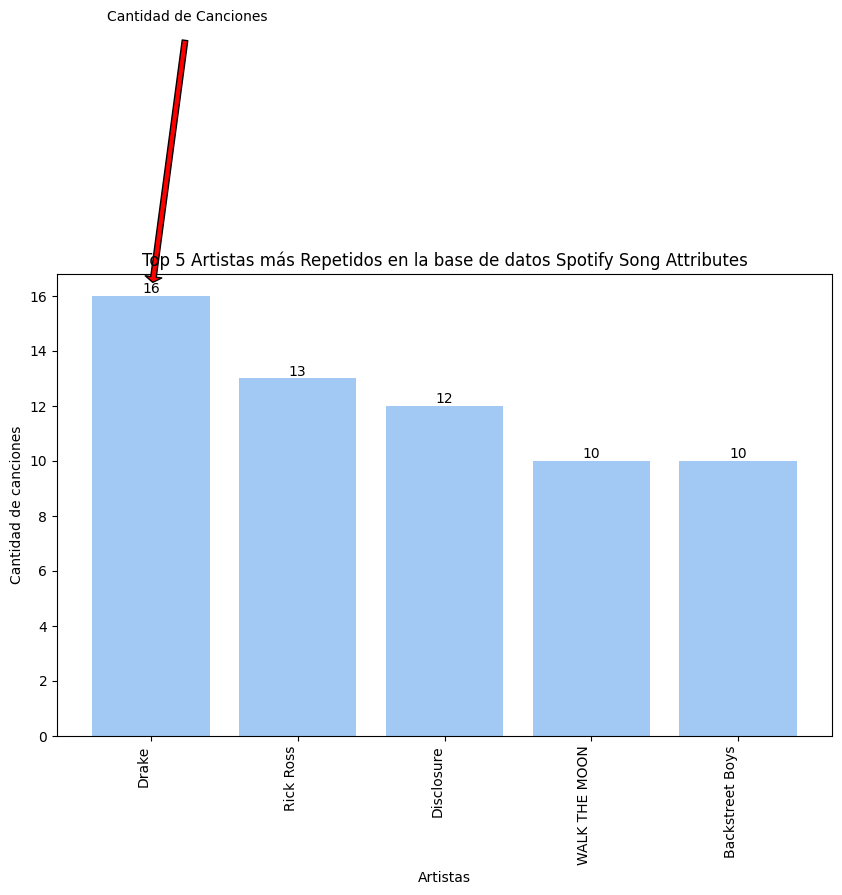

In [98]:
# Extraer los nombres de los artistas y sus conteos
artistas = top_5_artists_series.index
conteos = top_5_artists_series.values

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(artistas, conteos)
plt.xlabel('Artistas')
plt.ylabel('Cantidad de canciones')
plt.title('Top 5 Artistas más Repetidos en la base de datos Spotify Song Attributes')
for i, v in enumerate(conteos):
    plt.text(i, v, str(v), ha='center', va='bottom') #etiquetas con los valores
plt.xticks(rotation=90, ha='right')
x = 1
y = 2
x_offset = 0.5
y_offset = 0.5

# ubicar el indice de la  barra mas alta
highest_bar_index = conteos.argmax()

# ubicar la coordenada x de la  barra mas alta
x = highest_bar_index

# ubicar la coordenada y de la  barra mas alta
y = conteos[highest_bar_index]

# ajustar el ancho
x_offset = -0.3
y_offset = 10

plt.annotate('Cantidad de Canciones', xy=(x, y), xytext=(x + x_offset, y + y_offset),
             arrowprops=dict(facecolor='red', shrink=0.05, headlength=4)) # Adjust headlength as needed

Este gráfico es útil para comunicar de manera clara y concisa la frecuencia de los 5 artistas más repetidos en la base de datos "Spotify Song Attributes" y destacar al artista principal.
Con la flecha roja se apunta el valor de las canciones del artista más mencionado en el data set. (16 canciones).
Veamos ahora cómo es la proporción entre los cinco artitas más mencionados en el data set para compararlos entre sí.



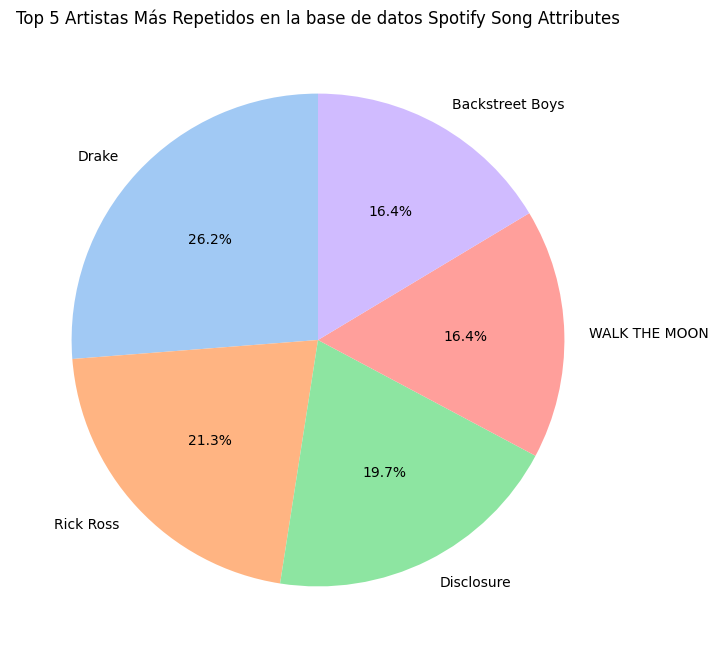

In [99]:
#ver la proporcion entre los 5 artistas mas mencionados en un grafico de torta usando Seaborn

# Extraer los nombres de los artistas y sus conteos
artistas = top_5_artists_series.index
conteos = top_5_artists_series.values

#  gráfico de torta
plt.figure(figsize=(8, 8))
sns.set_palette("pastel")
plt.pie(conteos, labels=artistas, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Artistas Más Repetidos en la base de datos Spotify Song Attributes')
plt.show()

Si bien se advierte que el artista Drake es el principal del top 5, los 4 restantes no se encuentran sustancialmente muy alejados del primero. Es una distribucion bastante proporcional.

##Analizaremos al artista 'preferido' del autor del data set, poniendo el foco en las canciones de 'Drake'.

In [100]:
#cuáles son las canciones del artista mas mencionado
canciones_drake = df_2[df_2['artist'] == 'Drake']['song_title']
print(canciones_drake)

5                        Sneakin’
6                     Childs Play
37                        Jumpman
117                 Hotline Bling
154                     Big Rings
158                 Know Yourself
168               Wu-Tang Forever
440                     Headlines
589       Started From the Bottom
676     Hold On, We're Going Home
717     Hold On, We're Going Home
779       0 To 100 / The Catch Up
1016             Skepta Interlude
1183                 Passionfruit
1218              Best I Ever Had
1223                    Take Care
Name: song_title, dtype: object


Ahora analicemos de tales canciones dónde se concentran los valores de las mismas dentro de la categoria 'danceability':

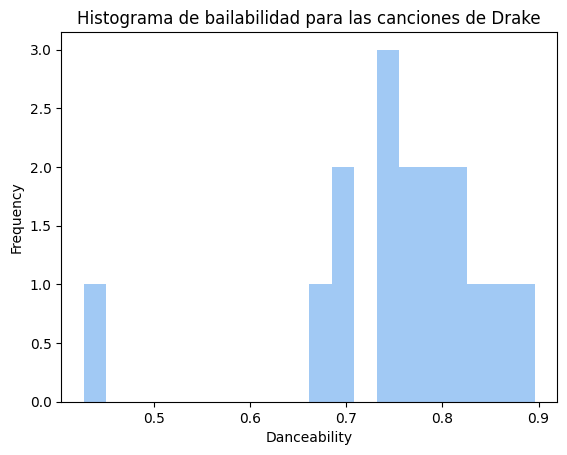

In [101]:
drake_danceability_df = df_2[df_2['artist'] == 'Drake'][['danceability']]
#print(drake_danceability_df)

plt.hist(drake_danceability_df['danceability'], bins=20)  # Adjust the number of bins as needed
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.title('Histograma de bailabilidad para las canciones de Drake')
plt.show()

Analizando el histograma de Danceability ´bailabilidad´ de las canciones de Drake se observa  una concentración de valores altos (hacia la derecha del gráfico), de modo que el insigh obtenido es que las canciones del artista Drake (de este data set) tienden a poseer un alto grado de bailabilidad.

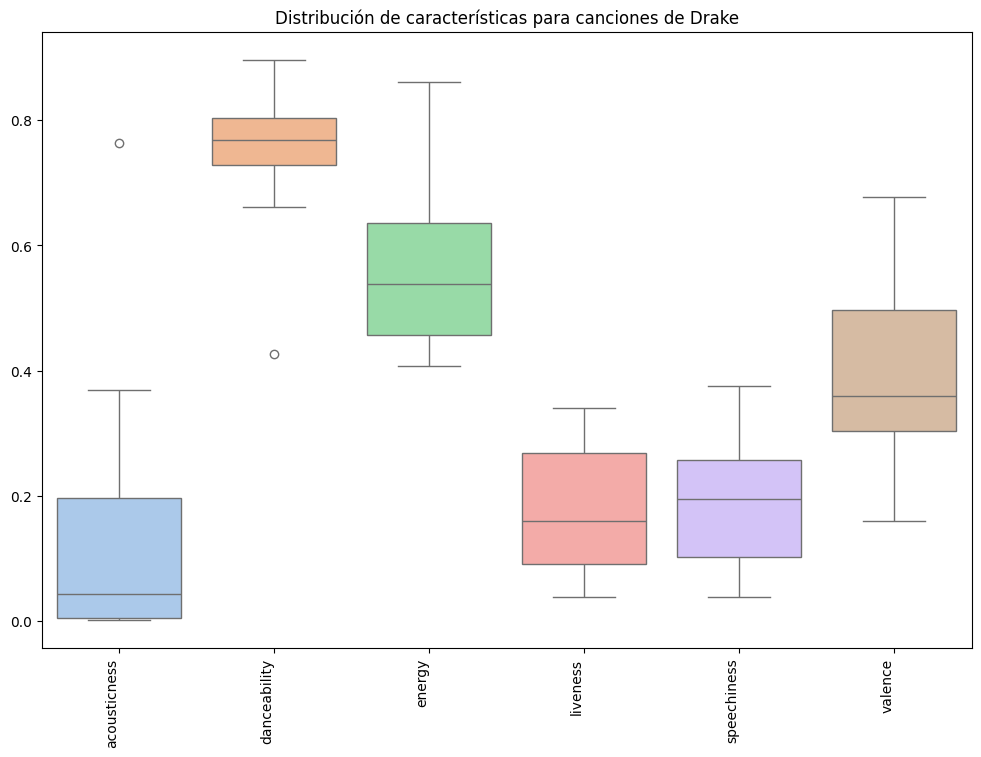

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
# Canciones de Drake
drake_songs = df_2[df_2['artist'] == 'Drake']

# Columnas deseadas para el gráfico
columnas_deseadas_grafico = ['acousticness', 'danceability', 'energy',
                     'liveness',   'speechiness',   'valence']

# Convierte la lista de Series en un DataFrame, seleccionando solo las columnas deseadas
drake_df = pd.DataFrame(drake_songs)[columnas_deseadas_grafico]

# Crea el diagrama de caja
plt.figure(figsize=(12, 8))
sns.boxplot(data=drake_df)
plt.xticks(rotation=90, ha='right')
plt.title('Distribución de características para canciones de Drake')
plt.show()

Insights:
al comparar la distribución de las diferentes características se observa que la principal caracteristica de las canciones de Drake es que son bailables (mediana mas alta y rango pequeño) y en segundo lugar canciones energeticas (mediana alta).
No hay canciones representadas por puntos fuera de los bigotes que permitan Identificar canciones atípicas.
La dispersión de los datos en cada caja  da una idea de la variabilidad en cada característica del estilo musical de Drake. La caractiristica con valores mas bajos es 'acustico'.
En este gráfico de cajas se observa la concordancia con la caracteristica 'bailable'(es donde mas se concentran los valores y donde se observan los valores mas altos y menos dispersos).

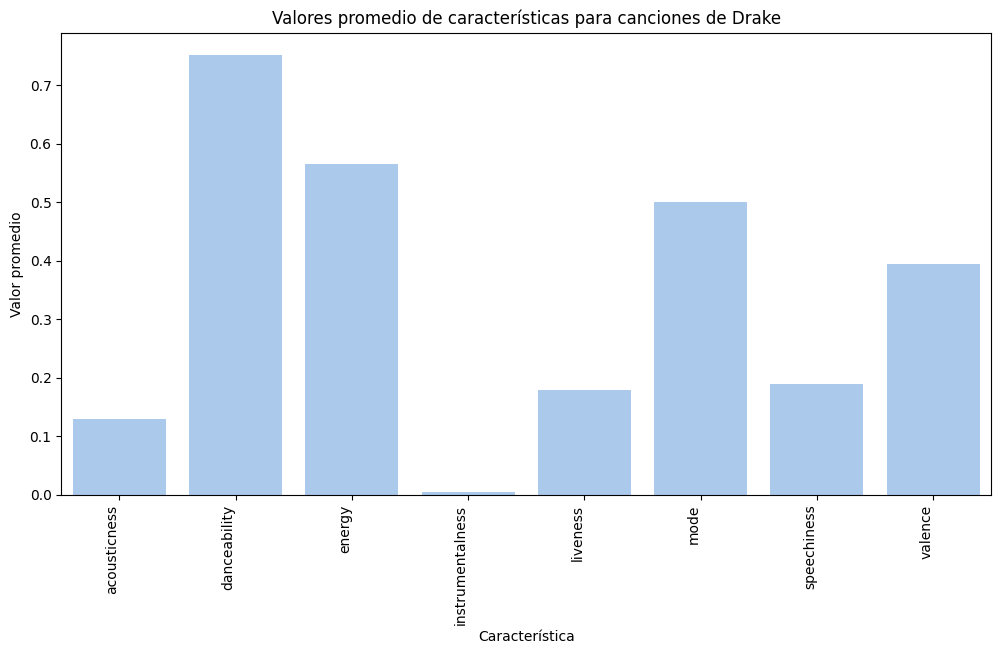

In [103]:
#distribucion de las caracteristicas de las canciones del artista mas mencionado
drake_songs = df_2[df_2['artist'] == 'Drake']
import seaborn as sns
import matplotlib.pyplot as plt

columnas_deseadas = ['acousticness', 'danceability',  'energy', 'instrumentalness',
                     'liveness',  'mode', 'speechiness',   'valence']

# Calcula el promedio de cada característica
promedios_drake = drake_songs[columnas_deseadas].mean()

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=promedios_drake.index, y=promedios_drake.values)
plt.xticks(rotation=90, ha='right')
plt.title('Valores promedio de características para canciones de Drake')
plt.ylabel('Valor promedio')
plt.xlabel('Característica')

plt.show()

en este grafico de barras (con los promedios de los valores de cada caracteristica) se puede interpretar conjuntamente con los dos graficos anteriores ( de histograma y el de barras). Con las tres clases de gráficos se infiere que la caracteristica 'bailable', es donde más se concentran los valores y donde se observan los valores mas altos y menos dispersos.

Ahora analizaremos las 16 canciones de Drake de acuerdo a las caracteristicas de 'acousticness', 'danceability', 'energy', 'liveness', y 'speechiness' usando grafico de radar.

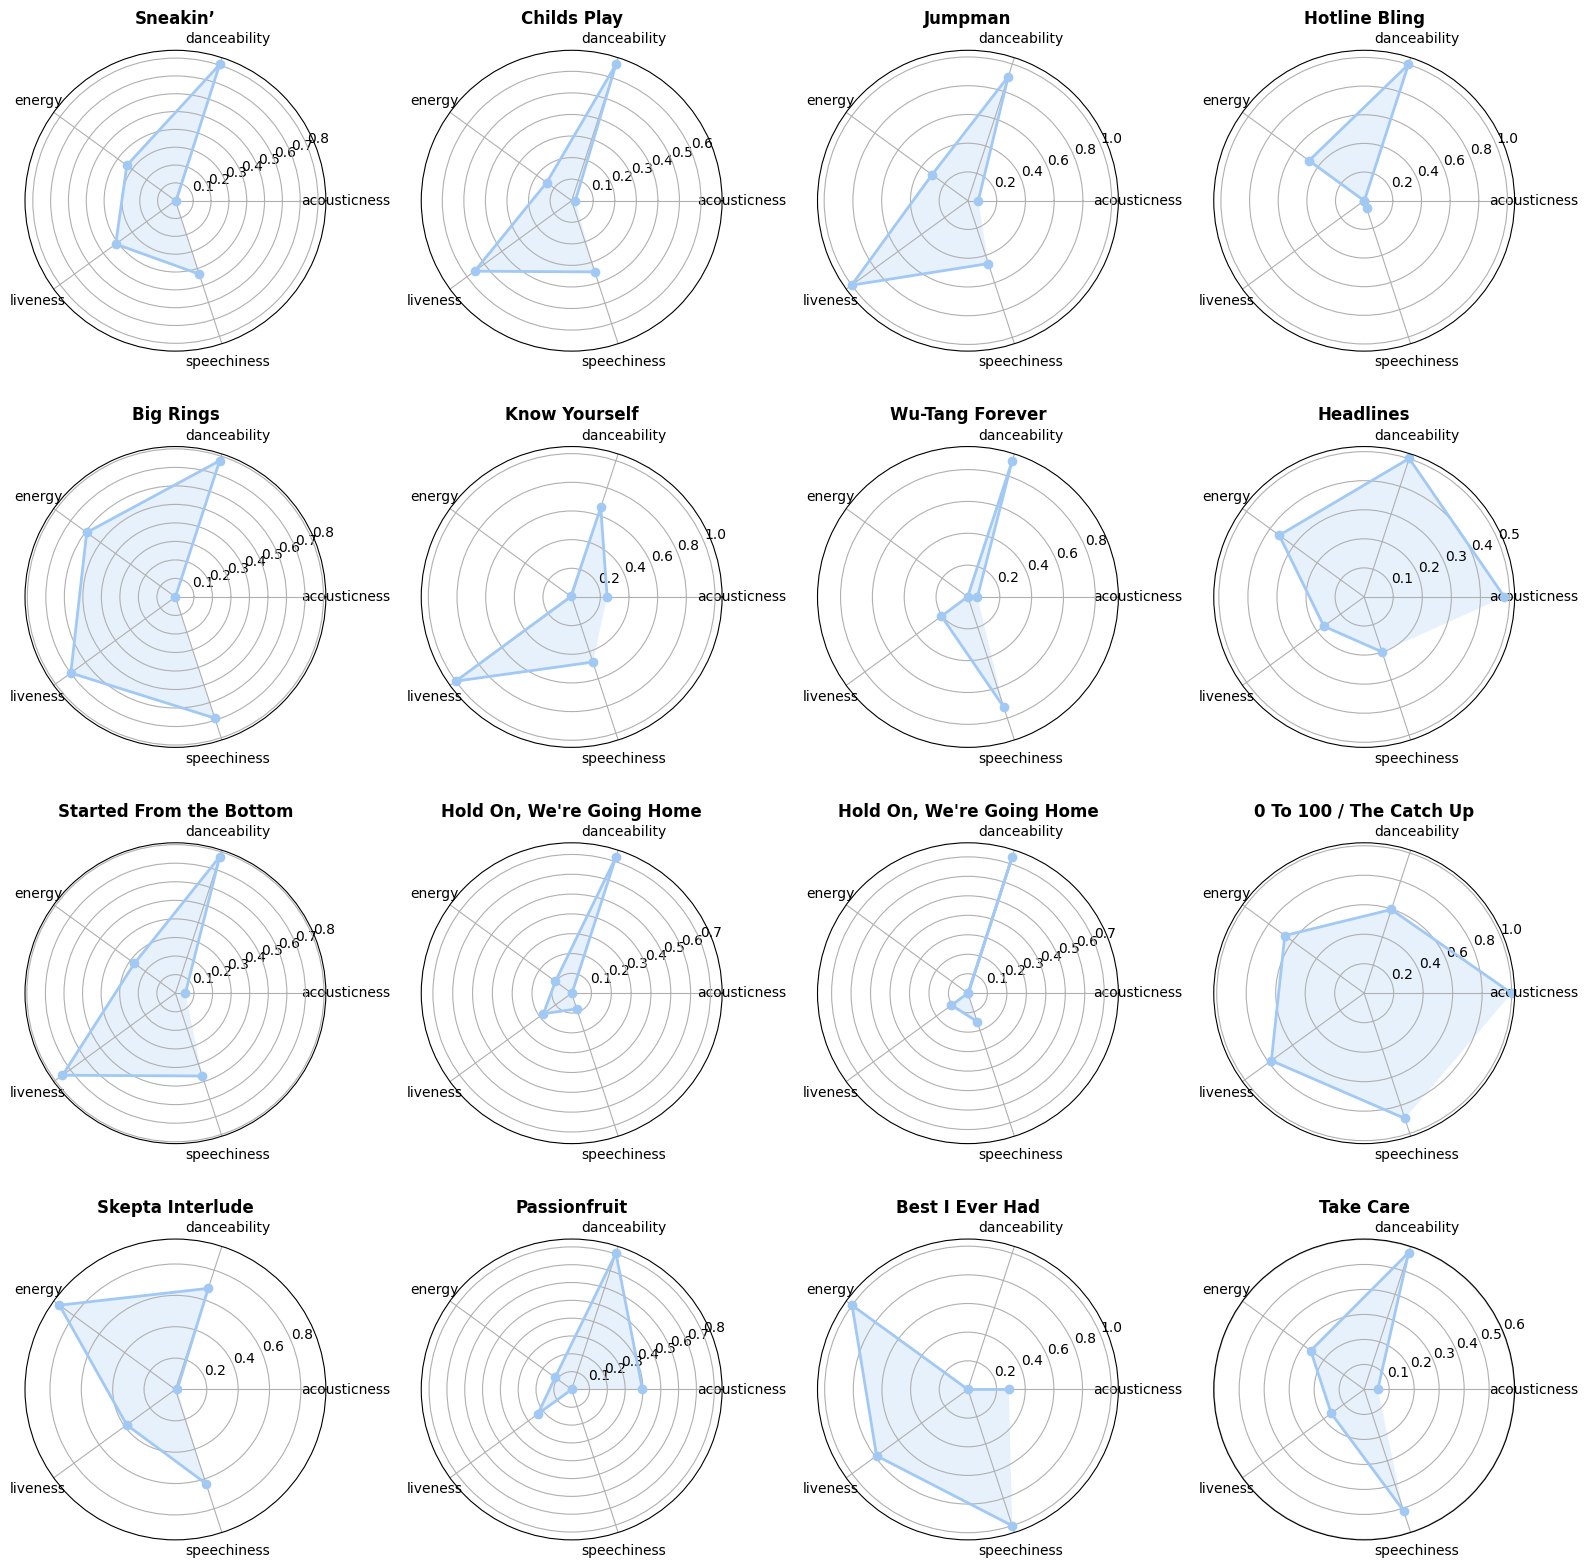

In [104]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Selecciona las columnas deseadas
columnas_deseadas = ['acousticness', 'danceability', 'energy', 'liveness', 'speechiness']

# Extrae los valores de las características para las canciones de Drake
drake_data = df_2[df_2['artist'] == 'Drake'][columnas_deseadas]

# Normaliza los valores entre 0 y 1
drake_data_norm = (drake_data - drake_data.min()) / (drake_data.max() - drake_data.min())

# Crea los ángulos para el gráfico de araña
angulos = np.linspace(0, 2*np.pi, len(columnas_deseadas), endpoint=False)
angulos = np.concatenate((angulos, [angulos[0]]))  # Cierra el círculo

# Crea una cuadrícula de subplots (4 filas x 4 columnas)
fig, axes = plt.subplots(4, 4, figsize=(16, 16), subplot_kw=dict(polar=True))

# Itera sobre las canciones y crea los gráficos de radar
for i in range(len(drake_data_norm)):
    valores_cancion = drake_data_norm.iloc[i].values.tolist()
    valores_cancion += valores_cancion[:1]  # Cierra el círculo para cada canción

    # Obtén el título de la canción usando el índice
    titulo_cancion = df_2[df_2['artist'] == 'Drake']['song_title'].iloc[i]

    # Calcula la posición del subplot en la cuadrícula
    fila = i // 4
    columna = i % 4

    # Crea el gráfico de radar en el subplot correspondiente
    ax = axes[fila, columna]
    ax.plot(angulos[:-1], valores_cancion[:-1], 'o-', linewidth=2)
    ax.fill(angulos[:-1], valores_cancion[:-1], alpha=0.25)
    ax.set_thetagrids(angulos[:-1] * 180/np.pi, columnas_deseadas)
    ax.set_title(f'{titulo_cancion}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

Al visualizar los 16 gráficos de radar de cada canción del artista Drake, se puede obtener informacion sobre la variabilidad de su estilo musical ya que los gráficos tienen formas muy diferentes entre sí.

Esto podría indicar que Drake experimenta con diferentes estilos musicales en sus canciones y donde la unica variable predominante  es 'bailable' ('danceability').

Las características predominantes en su música: la mayoría de las canciones de Drake tienen alta energía y bailabilidad. Podria afirmarse que su música es generalmente enérgica y bailable.

Canciones atípicas: el gráfico que se destaca del resto por tener una forma o valor muy diferente es el de la cancion 'Best I ever had' (por ser la unica cancion 'no bailale'. Esta cancion podría representar experimento musical o desviacion de su estilo habitual.

Siguiendo el correlato con los analisis realizados mediante los graficos anteriores (de barra e histograma) la caracteristica más observada para las canciones de Drake es 'bailabilidad'.

Teniendo en cuenta que la variable 'bailable' se repite en los análisis efectuados, ahora desearia saber dónde se concentran los datos haciendo un histograma para la base de datos en estudio. ¿será que al autor de la base de datos le suelen gustar canciones bailables en general? ¿o eso sólo sucede con las canciones del grupo Drake -su grupo con mayor cantidad de canciones en la base de datos-?. Veamos:

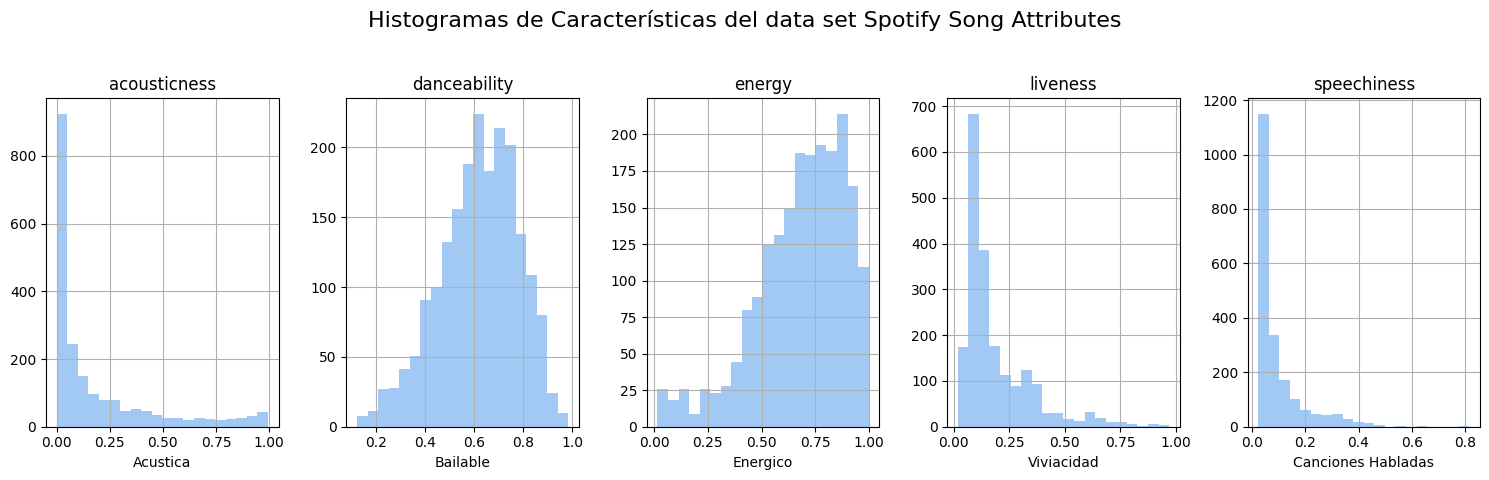

In [105]:
import matplotlib.pyplot as plt
import pandas as pd

# Seleccion de las columnas deseadas
columnas_deseadas = ['acousticness', 'danceability', 'energy', 'liveness', 'speechiness']

# Creacion del histograma
fig, axes = plt.subplots(1, len(columnas_deseadas), figsize=(15, 5))  # Crea subplots individuales
df_2[columnas_deseadas].hist(ax=axes, bins=20)

# Nuevos títulos
nuevos_titulos = ['Acustica', 'Bailable', 'Energico', 'Viviacidad', 'Canciones Habladas']

# Reemplazo los títulos de los gráficos
for i, ax in enumerate(axes.flatten()):
    ax.set_xlabel(nuevos_titulos[i])

plt.suptitle('Histogramas de Características del data set Spotify Song Attributes', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Se puede inferir que, lo que sucede con las canciones de Drake tambien se replica para la mayoria de las canciones de la base de datos. Es decir que el autor de este data set tiende a preferir canciones bailables y enérgicas, con bajos valores para canciones acústicas, y habladas.

Veamos ahora si esto mismo sucede respecto de los 5 artistas más repetidos en la base de datos, que ya habiamos obtenido más arriba: artistas_top_5 = ['Drake', 'Rick Ross', 'Disclosure', 'Walk the Moon', 'Backstreet Boys']


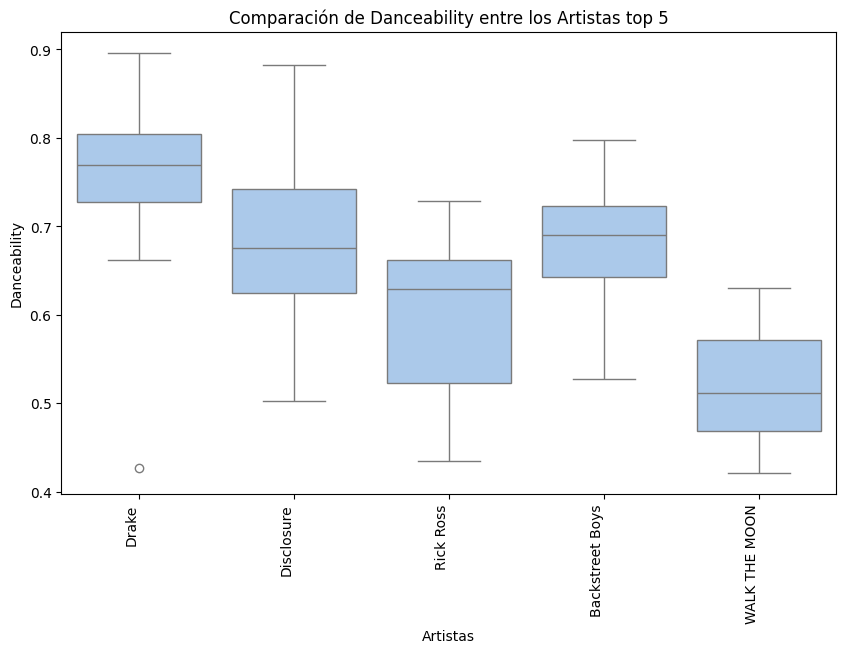

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Artistas más repetidos (top 5)
artistas_top = ['Drake', 'Rick Ross', 'Disclosure', 'WALK THE MOON', 'Backstreet Boys']

# Filtra el dataframe para incluir solo las canciones de estos artistas
df_filtrado = df_2[df_2['artist'].isin(artistas_top)]

# Crea el diagrama de caja
plt.figure(figsize=(10, 6))
sns.boxplot(x='artist', y='danceability', data=df_filtrado)
plt.xticks(rotation=90, ha='right')
plt.title('Comparación de Danceability entre los Artistas top 5')
plt.xlabel('Artistas')
plt.ylabel('Danceability')
plt.show()

Al comparar la mediana, los cuartiles y los valores atípicos de 'danceability' entre los artistas top 5, se observa variabilidad en el nivel de bailabilidad de sus canciones. Por lo tanto, si bien el autor tiene una tendencia hacia las canciones bailables considerando TODA la base de datos, cuando se focaliza en los 5 artitas más repetidos, la caracteristica bailable varia entre 0.8 (valor máximo para 'Drake') a 0,45 (valor mínimo: para 'Walk The Moon').

Veamos el detalle de 'danceability' y 'energy' en un grafico de barras agrupadas para los 5 artistas más repetidos. Esto  permite visualizar la cantidad de canciones, así como los valores promedio de 'danceability' y 'energy' para cada artista.



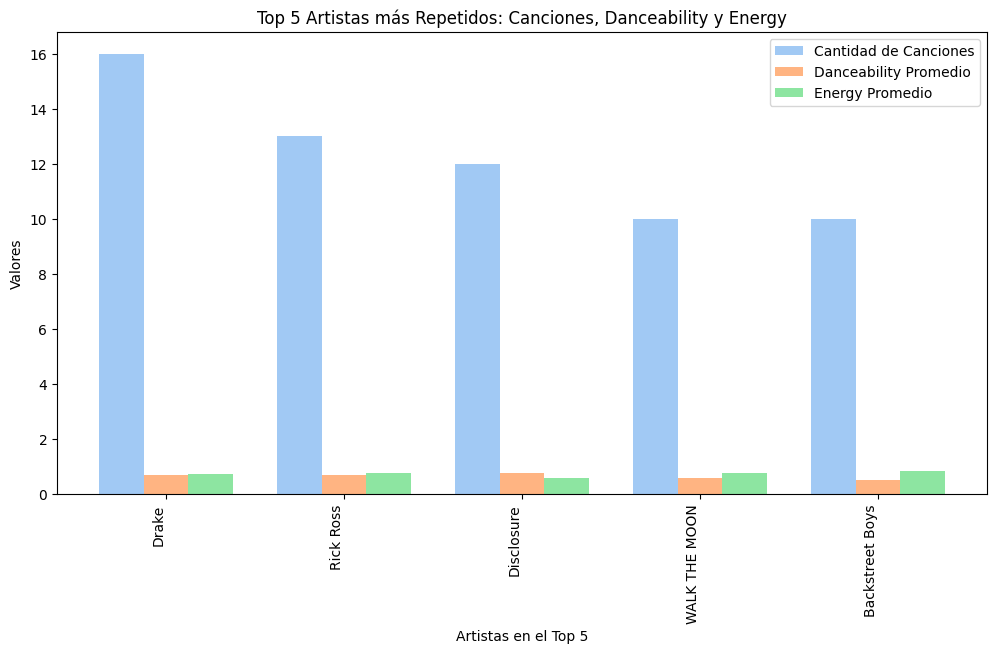

In [107]:
import numpy as np
# Extrae los nombres de los artistas y sus conteos
artistas = top_5_artists_series.index
conteos = top_5_artists_series.values
# Extrae los nombres de los artistas y sus conteos
artistas = top_5_artists_series.index
conteos = top_5_artists_series.values

# Filtra el dataframe para incluir solo las canciones de estos artistas
df_filtrado = df_2[df_2['artist'].isin(artistas)]

# Calcula el promedio de danceability y el promedio de energy para cada artista
datos_artistas = df_filtrado.groupby('artist').agg({'danceability': 'mean', 'energy': 'mean'})

# Crea el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(12, 6))

ancho_barra = 0.25
posiciones = np.arange(len(artistas))

ax.bar(posiciones - ancho_barra, conteos, width=ancho_barra, label='Cantidad de Canciones')
ax.bar(posiciones, datos_artistas['danceability'], width=ancho_barra, label='Danceability Promedio')
ax.bar(posiciones + ancho_barra, datos_artistas['energy'], width=ancho_barra, label='Energy Promedio')

ax.set_xticks(posiciones)
ax.set_xticklabels(artistas, rotation=90, ha='right')
ax.set_xlabel('Artistas en el Top 5')
ax.set_ylabel('Valores')
ax.set_title('Top 5 Artistas más Repetidos: Canciones, Danceability y Energy')
ax.legend()

se advierte que el gráfico de barras agrupadas no es el mejor para evidenciar la diferencia apuntada en la conclusion anterior, (respecto a los valores promedio de 'danceability' y 'energy' para cada artista) ya que la columna de cantidad de canciones impide ver la variacion entre los artistas respecto de las variables bajo analisis. dicho en otras palabras, el gráfico NO  evidencia la conclusión anteriormente desarrollada. Intentemos hacer uno nuevo SIN la columna Cantidad de Canciones:

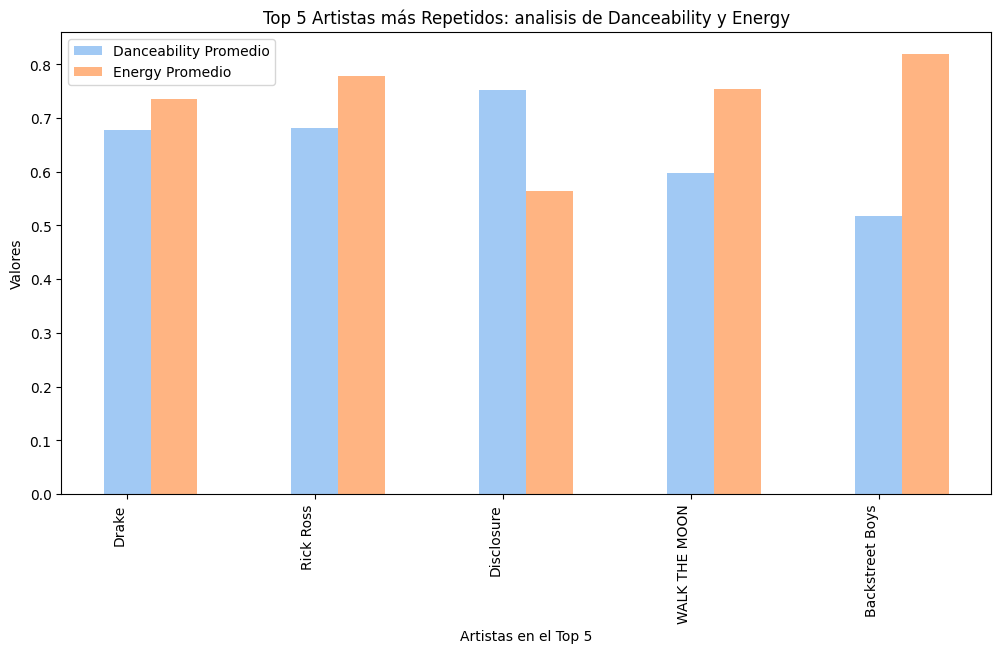

In [108]:
import numpy as np
# Extrae los nombres de los artistas y sus conteos
artistas = top_5_artists_series.index
conteos = top_5_artists_series.values
# Extrae los nombres de los artistas y sus conteos
artistas = top_5_artists_series.index
conteos = top_5_artists_series.values

# Filtra el dataframe para incluir solo las canciones de estos artistas
df_filtrado = df_2[df_2['artist'].isin(artistas)]

# Calcula el promedio de danceability y el promedio de energy para cada artista
datos_artistas = df_filtrado.groupby('artist').agg({'danceability': 'mean', 'energy': 'mean'})

# Crea el gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(12, 6))

ancho_barra = 0.25
posiciones = np.arange(len(artistas))

ax.bar(posiciones, datos_artistas['danceability'], width=ancho_barra, label='Danceability Promedio')
ax.bar(posiciones + ancho_barra, datos_artistas['energy'], width=ancho_barra, label='Energy Promedio')

ax.set_xticks(posiciones)
ax.set_xticklabels(artistas, rotation=90, ha='right')
ax.set_xlabel('Artistas en el Top 5')
ax.set_ylabel('Valores')
ax.set_title('Top 5 Artistas más Repetidos: analisis de Danceability y Energy')
ax.legend()

Con el gráfico anterior se vuelve a evidenciar que los valores Danceability y Energy'(para el Top 5 de Artistas más Repetidos) son elevados y se muestra de mejor modo la diferencia de valores entre cada uno de ellos.


#### ¿Como influye la variable Duración ('duration_ms') en el data set respecto de la caracteristica 'danceability'?
Ya hemos analizado cuáles son los artitas favoritos del autor del data set y que la característica distintiva de la base de datos y del artista favorito tiende a ser 'dancecability'.
Indaguemos seguidamente si hay relación entre la variable 'danceability' y la duración de las canciones que posee el data set.
Primero analizaremos usando el método describe de la columna 'duration_ms', teniendo en cuenta que la duración de las canciones del data set están expresadas en milisegundos.

In [109]:
#repitamos el metodo describe
df_2.describe().round()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0,2017.0
mean,1008.0,0.0,1.0,246306.0,1.0,0.0,5.0,0.0,-7.0,1.0,0.0,122.0,4.0,0.0,1.0
std,582.0,0.0,0.0,81982.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,27.0,0.0,0.0,1.0
min,0.0,0.0,0.0,16042.0,0.0,0.0,0.0,0.0,-33.0,0.0,0.0,48.0,1.0,0.0,0.0
25%,504.0,0.0,1.0,200015.0,1.0,0.0,2.0,0.0,-8.0,0.0,0.0,100.0,4.0,0.0,0.0
50%,1008.0,0.0,1.0,229261.0,1.0,0.0,6.0,0.0,-6.0,1.0,0.0,121.0,4.0,0.0,1.0
75%,1512.0,0.0,1.0,270333.0,1.0,0.0,9.0,0.0,-5.0,1.0,0.0,138.0,4.0,1.0,1.0
max,2016.0,1.0,1.0,1004627.0,1.0,1.0,11.0,1.0,-0.0,1.0,1.0,219.0,5.0,1.0,1.0


In [110]:
#variable Duration_ms
df_2['duration_ms'] = df_2['duration_ms'].round(2)  # redondear a 2 decimales
descripcion_duracion = df_2['duration_ms'].describe(). round(2)
print(descripcion_duracion)

count       2017.00
mean      246306.20
std        81981.81
min        16042.00
25%       200015.00
50%       229261.00
75%       270333.00
max      1004627.00
Name: duration_ms, dtype: float64


El tiempo expresado en milisegundos debe ser convertido a minutos para poder ser comprendido:

In [111]:
df_2['duration_min'] = df_2['duration_ms'] / (1000 * 60)  # Divide milisegundos (1000 * 60) para obtener minutos
descripcion_duracion = df_2['duration_min'].describe(). round(2)
print(descripcion_duracion)

count    2017.00
mean        4.11
std         1.37
min         0.27
25%         3.33
50%         3.82
75%         4.51
max        16.74
Name: duration_min, dtype: float64


Ahora vemos los datos más importantes del data set segun la duración en min:
la cancion más corta (0,27 min)
la cancion más extensa (16.74 min)
la duración promedio (4.11 min).
Vemos que la desviación estandar es de 1.37 minutos:
significa que aproximadamente el 68% de las canciones en el data set tienen duraciones dentro de 1.37 minutos por encima o por debajo de la duración promedio.
Alrededor del 95% de las canciones caen dentro de dos desviaciones estándar (2 * 1.37 = 2.74 minutos) de la media.
Casi todas (99.7%) de las canciones están dentro de tres desviaciones estándar (3 * 1.37 = 4.11 minutos) de la duración promedio.

In [112]:
# Encontrar el indice de la fila con la menor duración en minutos
index_min = df_2['duration_min'].idxmin()

# Encontrar el indice de la fila con la mayor duración en minutos
index_max = df_2['duration_min'].idxmax()

# obtener ahora el titulo de la canción, la duración y el artista correspondiente a tales índices
song_min = df_2.loc[index_min, 'song_title']
duration_min = df_2.loc[index_min, 'duration_min']
artist_min = df_2.loc[index_min, 'artist']

song_max = df_2.loc[index_max, 'song_title']
duration_max = df_2.loc[index_max, 'duration_min']
artist_max = df_2.loc[index_max, 'artist']


print(f"La canción con la menor duracion es: '{song_min}', interpretada por el artista: '{artist_min}' con una duración de {round(duration_min,2)} minutos)")

print(f"La canción con la mayor duracion es: '{song_max}', interpretada por el artista: '{artist_max}' con una duración de {round(duration_max,2)} minutos)")

La canción con la menor duracion es: 'Zac Brown Band - Hot Country', interpretada por el artista: 'Various Artists' con una duración de 0.27 minutos)
La canción con la mayor duracion es: 'The Nearness of You', interpretada por el artista: 'Joshua Redman' con una duración de 16.74 minutos)


Ya vimos cuál es la canción más extensa, la más corta, la duración promedio y algo acerca de la desviación estandar de la duración. Ahora podríamos representarlo en un histograma: ¿dónde se concentran la mayoría de las canciones de la base de datos dentro de 'duración'?(expresado ahora en Minutos y no en Milisegundos)

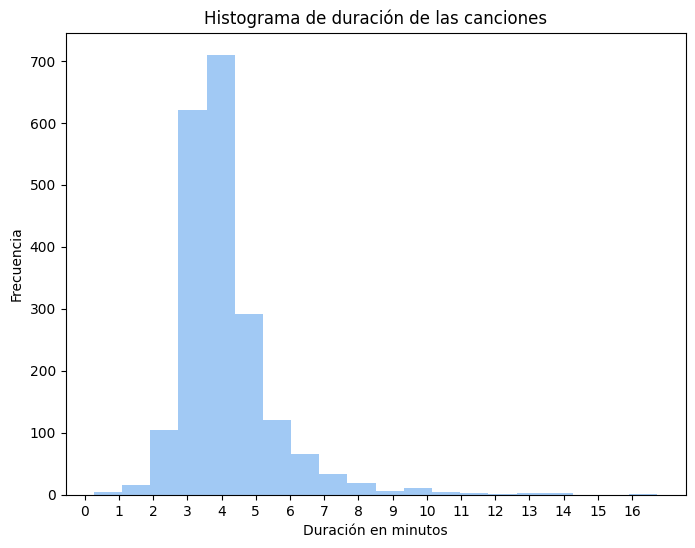

In [113]:
df_2['duration_min'] = df_2['duration_ms'] / (1000 * 60)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df_2['duration_min'], bins=20)
plt.xlabel('Duración en minutos')
plt.ylabel('Frecuencia')
plt.title('Histograma de duración de las canciones')
# Calcula el mínimo y el máximo de la duración en minutos
min_duracion = int(df_2['duration_min'].min())
max_duracion = int(df_2['duration_min'].max()) + 1

# Genera una lista de marcas desde el mínimo hasta el máximo
marcas_x = list(range(min_duracion, max_duracion))

# Aplica las marcas al eje x
plt.xticks(marcas_x)

plt.show()


Promedio de duración de las canciones del data set:

In [114]:
promedio_duracion_minutos = df_2['duration_min'].mean()
promedio_redondeado = round(promedio_duracion_minutos, 2)
print('El promedio de las canciones del data set es de \033[1m\033[3;35m', promedio_redondeado, '\033[0m minutos.')

El promedio de las canciones del data set es de  4.11  minutos.


Vemos que el resultado del cálculo promedio es consecuente con el gráfico de histograma. Ahora veamos lo mismo pero mediante un gráafico de Cajas

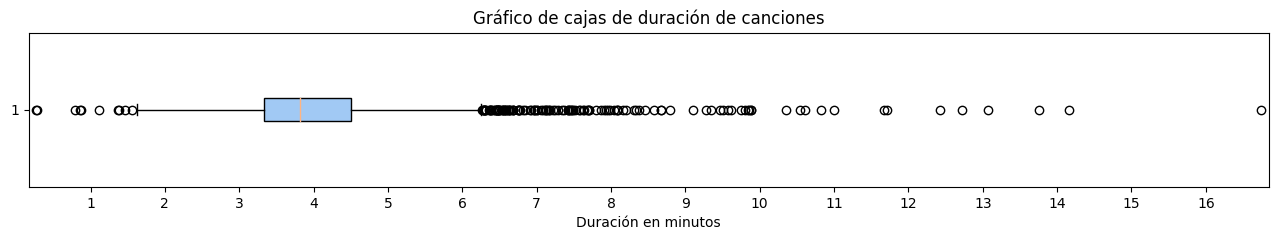

In [115]:
import matplotlib.pyplot as plt

# Calcular los límites del eje x
min_valor = df_2['duration_min'].min()
max_valor = df_2['duration_min'].max()

plt.figure(figsize=(16, 2))
plt.boxplot(df_2['duration_min'], vert=False, patch_artist=True)
plt.xlabel('Duración en minutos')
plt.title('Gráfico de cajas de duración de canciones')
# Calcula el mínimo y el máximo de la duración en minutos
min_duracion = int(df_2['duration_min'].min())
max_duracion = int(df_2['duration_min'].max()) + 1

# Genera una lista de marcas desde el mínimo hasta el máximo
marcas_x = list(range(min_duracion, max_duracion))

# Aplica las marcas al eje x
plt.xticks(marcas_x)


# Ajustar los límites del eje x
plt.xlim(min_valor - 0.1, max_valor + 0.1)  # Ajusta los valores -0.5 y +0.5 según sea necesario

plt.show()


Con este gráfico de cajas de la duración de las canciones, se puede  analizar varios aspectos de la distribución de los datos del data set:

1. Mediana: La línea dentro de la caja representa la mediana, es decir, el valor que divide la distribución en dos mitades iguales. Demuestra dónde se encuentra la duración típica de las canciones en el dataset. (cercana a los 4 minutos)

2. Cuartiles: Los bordes de la caja representan el primer y tercer cuartil (Q1 y Q3). Estos valores dividen la distribución en cuatro partes iguales. La distancia entre Q1 y Q3 (el rango intercuartil)  indica la dispersión de la mitad central de los datos.

3. Rango: Las líneas que se extienden desde la caja (bigotes) muestran el rango de los datos, excluyendo posibles valores atípicos. Se puede observar la duración mínima y máxima de las canciones dentro de este rango.

4. Valores atípicos: Los puntos individuales fuera de los bigotes representan posibles valores atípicos, es decir, canciones con duraciones inusualmente largas o cortas en comparación con el resto de la distribución.

Veamos ahora cómo quedaria representado mediante el método de puntuación z el gráfico de cajas:

##Diagrama de caja de puntuaciones Z

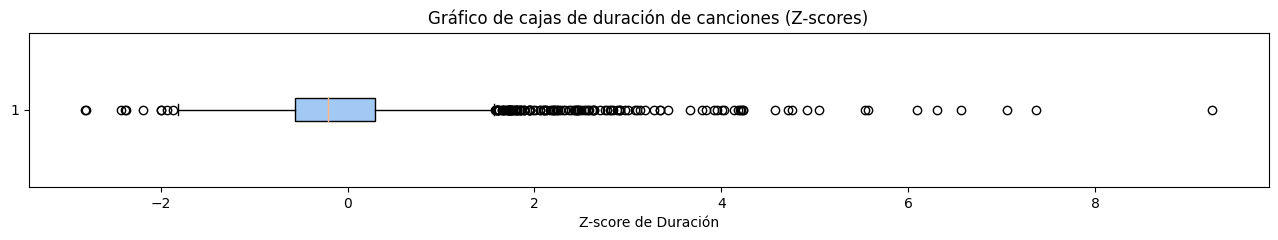

In [116]:
from scipy import stats
df_2['z_score_duration'] = stats.zscore(df_2['duration_min'])

plt.figure(figsize=(16, 2))
plt.boxplot(df_2['z_score_duration'], vert=False, patch_artist=True)
plt.xlabel('Z-score de Duración')
plt.title('Gráfico de cajas de duración de canciones (Z-scores)')
plt.show()

Al calcular las puntuaciones z, se transforman los valores de 'duration_min' en una distribución normal estándar con una media de 0 y una desviación estándar de 1.

Esto permite identificar valores atípicos en función de cuántas desviaciones estándar están lejos de la media.

El diagrama de caja de puntuaciones z representa visualmente la distribución de estos valores estandarizados, lo que facilita la identificación de posibles valores atípicos. En este caso los que estan por debajo de -2 y los que se hallan mas alla de 4.

####Combinación de variables analizadas hasta ahora.
Ya analizamos en la primer parte las caracteristicas de las canciones y descubrimos la preponderancia de las características 'danceability' y 'energy'.

Seguidamente analizamos acerca de la duración de las canciones.

Ahora veamos cuál es la correlación entre tales variables entre sí representándolas mediante graficos de dispersión.

##Gráfico de dispersión: Duración y Danceability




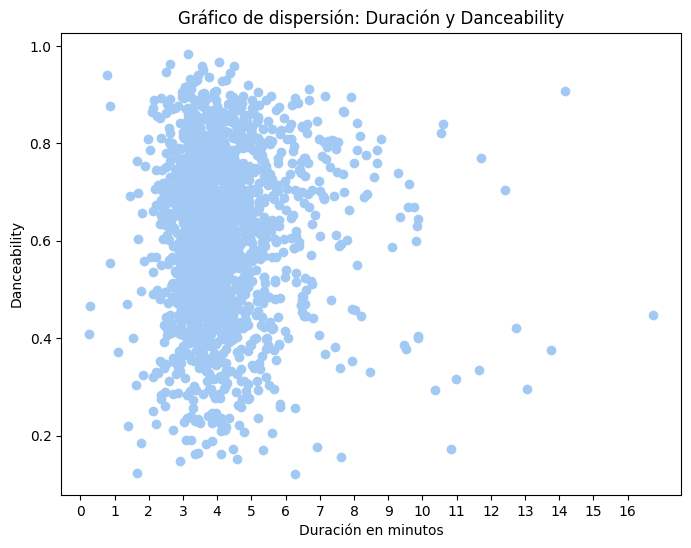

In [117]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_2['duration_min'], df_2['danceability'])
plt.xlabel('Duración en minutos')
plt.ylabel('Danceability')
plt.title('Gráfico de dispersión: Duración y Danceability')
# Calcula el mínimo y el máximo de la duración en minutos
min_duracion = int(df_2['duration_min'].min())
max_duracion = int(df_2['duration_min'].max()) + 1

# Genera una lista de marcas desde el mínimo hasta el máximo
marcas_x = list(range(min_duracion, max_duracion))

# Aplica las marcas al eje x
plt.xticks(marcas_x)

plt.show()

Veamos ahora como quedaria representado en un gráfico de dispersión de puntos respecto de la variable 'Energy'

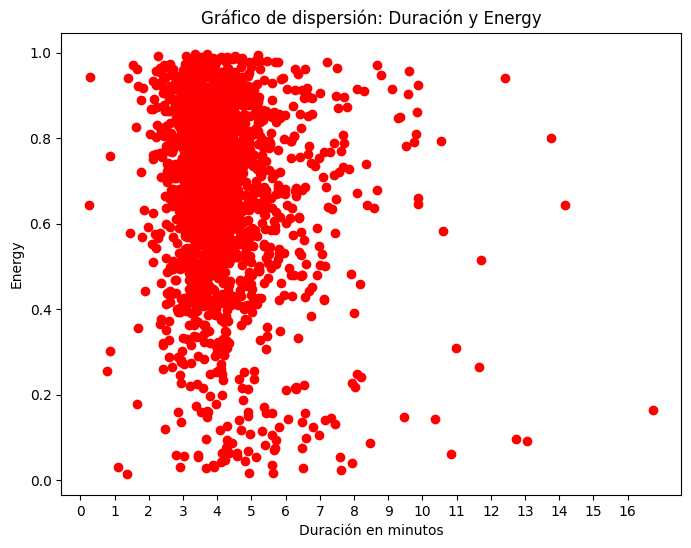

In [118]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_2['duration_min'], df_2['energy'], color='red')
plt.xlabel('Duración en minutos')
plt.ylabel('Energy')
plt.title('Gráfico de dispersión: Duración y Energy')

# Calcula el mínimo y el máximo de la duración en minutos
min_duracion = int(df_2['duration_min'].min())
max_duracion = int(df_2['duration_min'].max()) + 1

# Genera una lista de marcas desde el mínimo hasta el máximo
marcas_x = list(range(min_duracion, max_duracion))

# Aplica las marcas al eje x
plt.xticks(marcas_x)

plt.show()

Veamos las dos representaciones juntas usando subplots en Matplotlib. Lo que permitirá crear dos gráficos en una misma figura. Esto permite una comparación visual directa entre las dos relaciones.

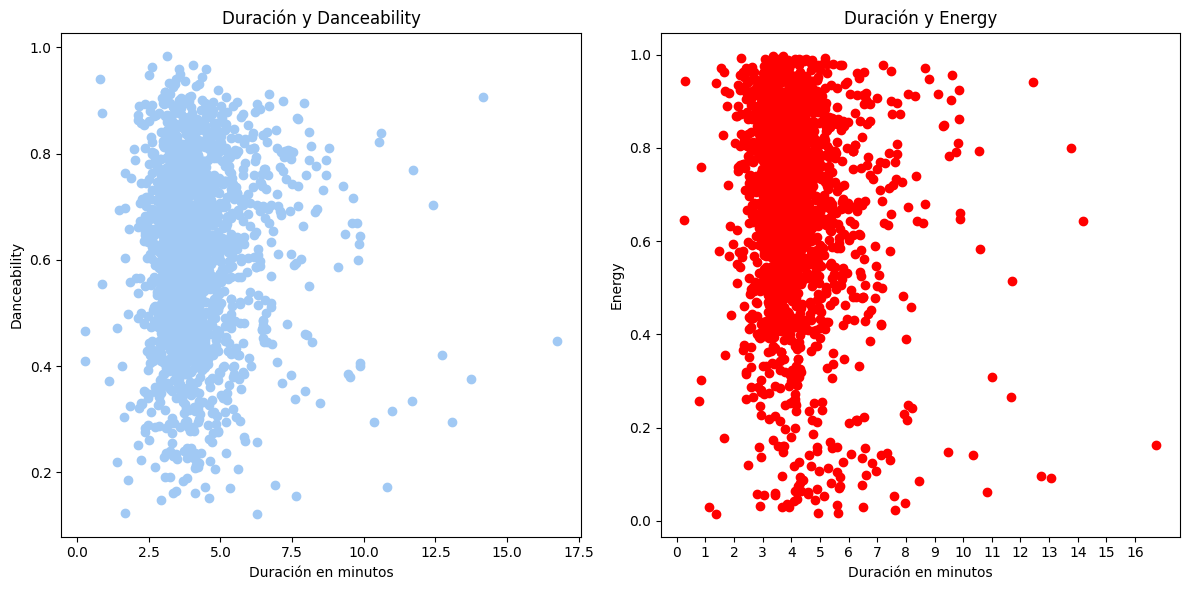

In [119]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Crea dos subplots en una fila

# Gráfico 1: Duración vs. Danceability
ax1.scatter(df_2['duration_min'], df_2['danceability'])
ax1.set_xlabel('Duración en minutos')
ax1.set_ylabel('Danceability')
ax1.set_title('Duración y Danceability')


# Aplica las marcas al eje x
plt.xticks(marcas_x)
# Gráfico 2: Duración vs. Energy
ax2.scatter(df_2['duration_min'], df_2['energy'], color='red')
ax2.set_xlabel('Duración en minutos')
ax2.set_ylabel('Energy')
ax2.set_title('Duración y Energy')

plt.tight_layout()  # Ajusta el espaciado entre los subplots
plt.show()

Insights:


*   Duración y Bailabilidad
Se observa una concentración de canciones bailables (de 0.5 a 0.8) con una duracion aprox. de 4 min.

*   Duración y Energía
Se observa una concentración de canciones energicas (de 0.6 a 10) con una duracion aprox. de 4 min.


Ahora veamos cuál es la influencia de la variable 'energy' en la variable 'danceability' dentro de un solo gráfico (donde la relación entre la duración y 'danceability' se representa mediante la posición de los puntos, y la variable 'energy' se mapea al color de los puntos).
Esto permite visualizar la influencia de 'energy' en la relación entre duración y 'danceability' en un solo gráfico.
Veamos:

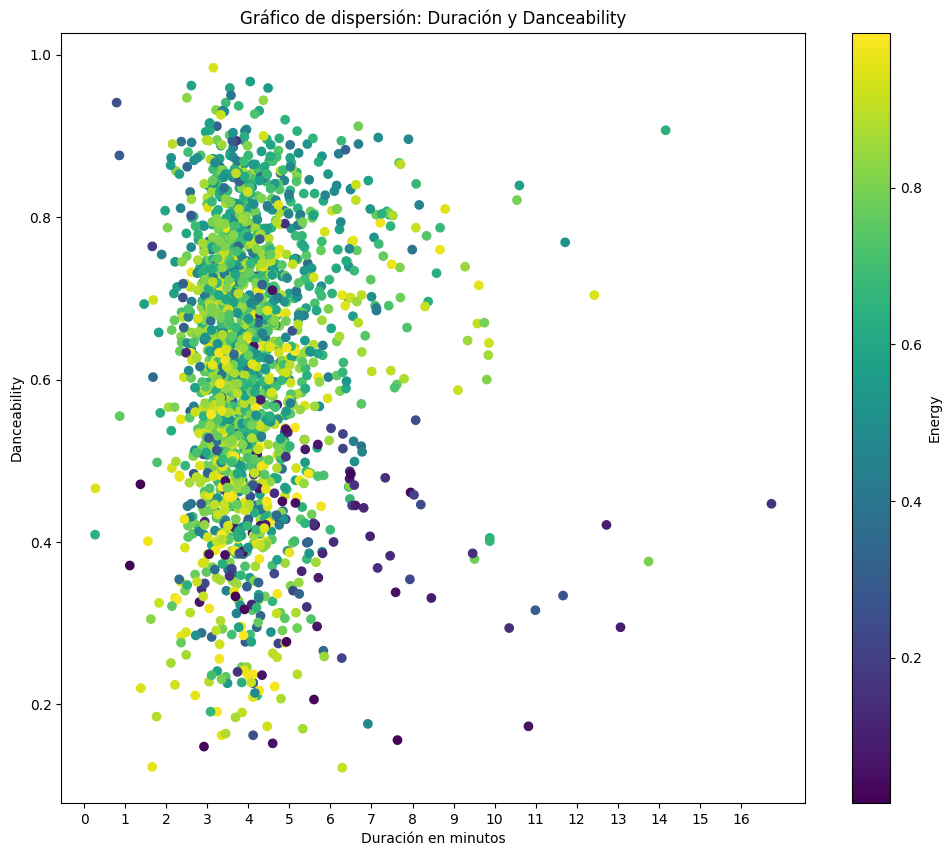

In [120]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
plt.scatter(df_2['duration_min'], df_2['danceability'], c=df_2['energy'], cmap='viridis')
plt.xlabel('Duración en minutos')
plt.ylabel('Danceability')
plt.title('Gráfico de dispersión: Duración y Danceability')
plt.colorbar(label='Energy')  # Agrega una barra de colores para mostrar la escala de 'energy'
# Calcula el mínimo y el máximo de la duración en minutos
min_duracion = int(df_2['duration_min'].min())
max_duracion = int(df_2['duration_min'].max()) + 1  # Suma 1 para incluir el máximo en el rango

# Genera una lista de marcas desde el mínimo hasta el máximo
marcas_x = list(range(min_duracion, max_duracion))

# Aplica las marcas al eje x
plt.xticks(marcas_x)

plt.show()

Aqui podemos observar que la mayoria de las canciones con altos niveles de danceability tienen una duracion semejante al promedio de las canciones del data set (3,75 / 4 Min.). Y que el valor 'energy' que más influye se encuentra entre 0,6 y 0,8.


# OBJETIVO n°2.

  

>  Intentar crear un algoritmo que prediga qué canciones le gustarán al autor del data set.

####A fines de poder abordar el objetivo n° 2 respecto de la base de datos 'Atributos de las canciones de Spotify' debemos hacer una matriz de correlacion con los valores numéricos seleccionando las siguientes columnas: 'acousticness', 'danceability', 'duration_ms', 'energy',            'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness' y 'valence'.

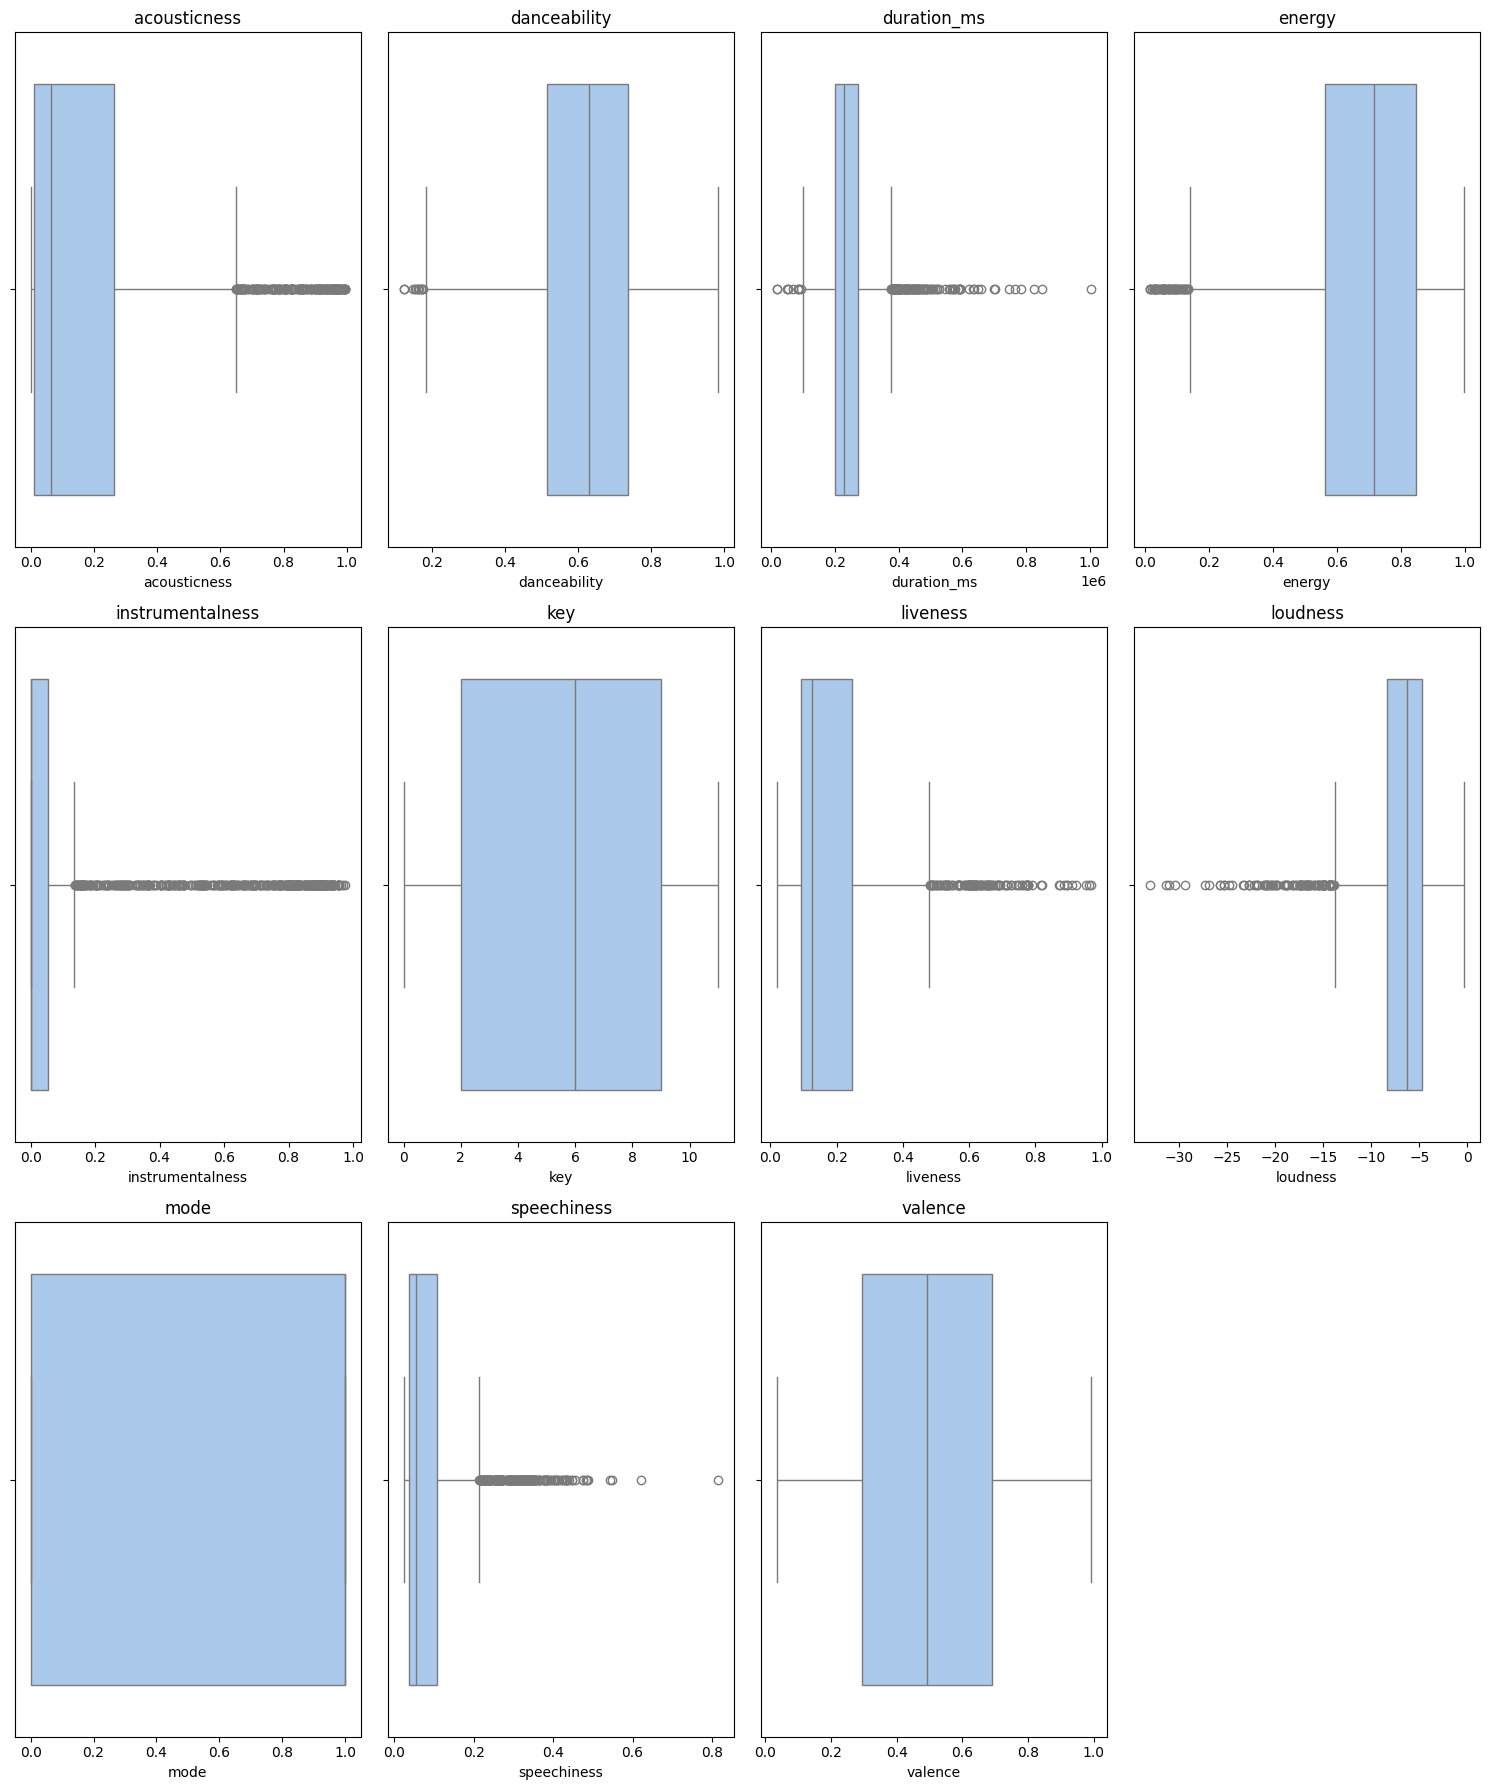

In [121]:
#indagar sobre la existencia de valores outliers:
# Columnas seleccionadas:
df_selected = df_2[['acousticness', 'danceability', 'duration_ms', 'energy',
                     'instrumentalness', 'key', 'liveness', 'loudness',
                     'mode', 'speechiness', 'valence']]
# Representarlas de a 4 graficos
n_rows = int(np.ceil(len(df_selected.columns) / 4))

# Crear una figura con todos los box plots
plt.figure(figsize=(15, 6 * n_rows))

# creacion de  box plots para cada columna
for i, column in enumerate(df_selected.columns):
  plt.subplot(n_rows, 4, i + 1)  # n_rows rows, 4 columns
  sns.boxplot(x=df_selected[column])
  plt.title(column)

plt.tight_layout()
plt.show()

Se observa la existencia de valores outliers.

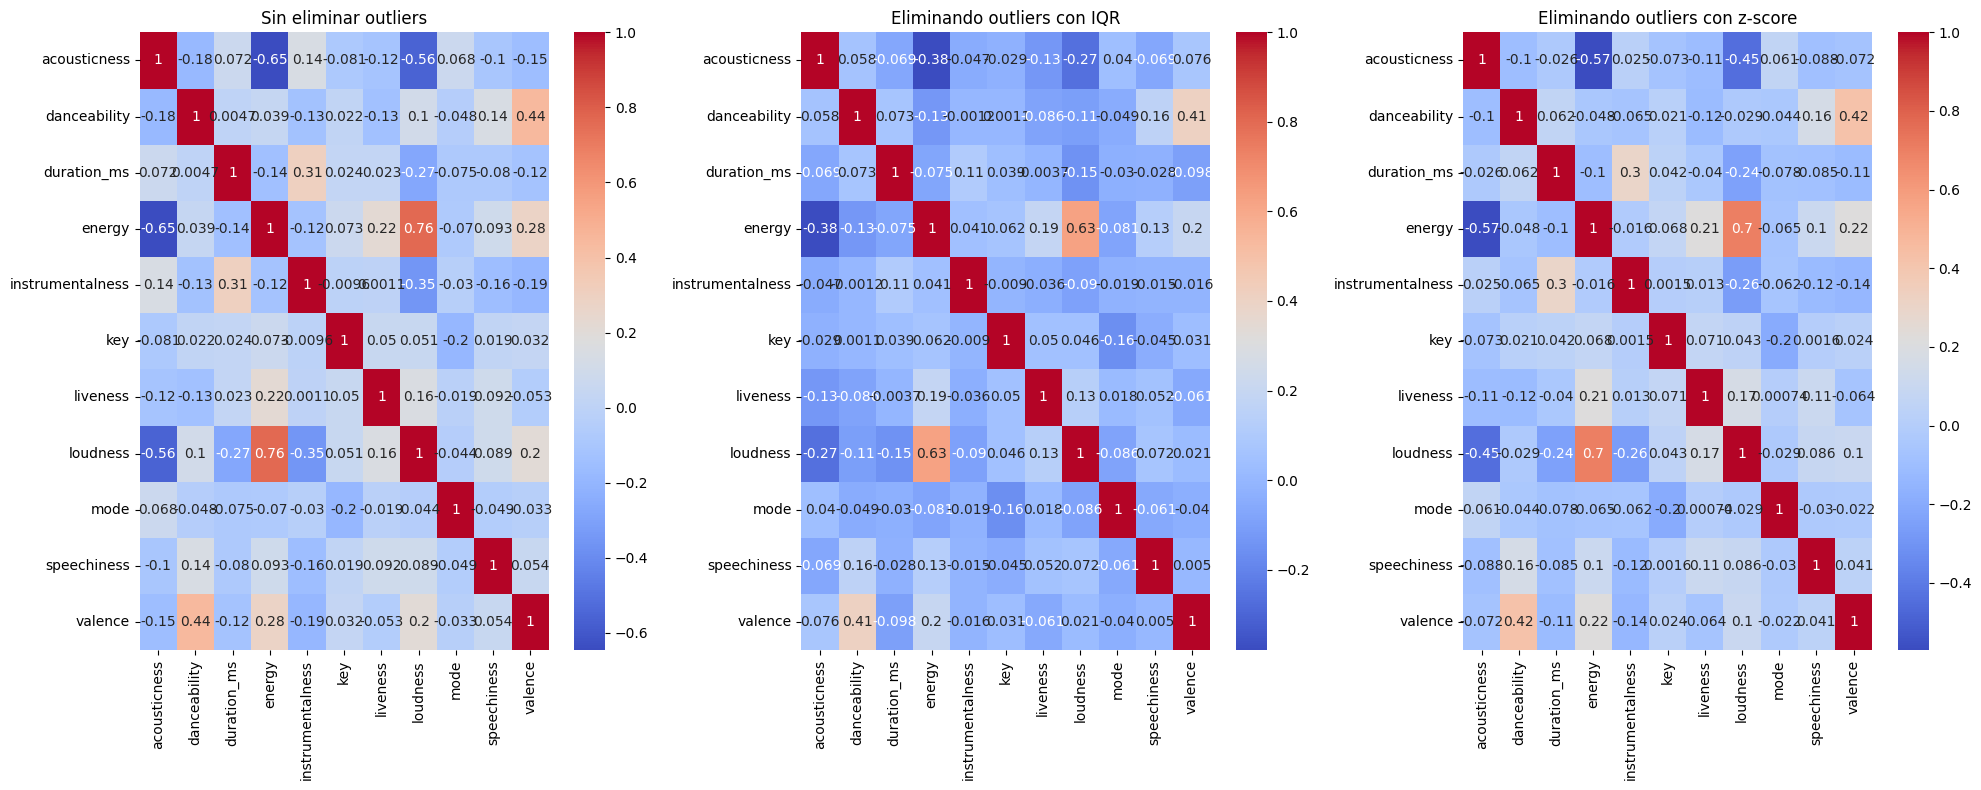

In [122]:
# manejo de outliers
#usaré 2 métodos: IQR y z-score

def outliers(data,feature):
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1

    lower_limit = q1 - iqr *1.5
    upper_limit = q3 + iqr *1.5

    ls = data.index[(data[feature]<lower_limit) | (data[feature]>upper_limit)]

    return ls

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

# Columnas seleccionadas:
df_selected = df_2[['acousticness', 'danceability', 'duration_ms', 'energy',
                     'instrumentalness', 'key', 'liveness', 'loudness',
                     'mode', 'speechiness', 'valence']]

# Calcuar la matriz de correlacion sin eliminar outliers
correlation_matrix1 = df_selected.corr()

# Remover outliers usando IQR
index_list = []
for feature in df_selected:
    index_list.extend(outliers(df_selected, feature))
df_selected_cleaned = remove(df_selected, index_list)
correlation_matrix2 = df_selected_cleaned.corr()

# Remover outliers usando z-score
z = np.abs(stats.zscore(df_selected))
df_selected_filtered = df_selected[(z < 3).all(axis=1)]
correlation_matrix3 = df_selected_filtered.corr()

# Creacion de Subplot
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# Heatmap 1: Sin Remover outliers
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Sin eliminar outliers')
axes[0].tick_params(axis='x', rotation=90)

# Heatmap 2: Eliminando outliers con IQR'
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Eliminando outliers con IQR')
axes[1].tick_params(axis='x', rotation=90)

# Heatmap 3: Eliminando outliers con z-score
sns.heatmap(correlation_matrix3, annot=True, cmap='coolwarm', ax=axes[2])
axes[2].set_title('Eliminando outliers con z-score')
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

##Outliers

A partir de la escala cromática de las tres imagenes que anteceden, y comparando los mapas de calor *con y sin eliminación de outliers*, se observa que **la eliminación de valores atípicos mediante Z-score o IQR no mejora la correlación entre las variables.**

Esto puede deberse a que los valores atípicos eliminados contienen información relevante para el análisis.

Por lo tanto, en este caso, no es recomendable eliminar los outliers, ya que no se obtiene una mejora en la correlación entre las variables.

Se puede inferir que los valores atípicos son parte de la variabilidad natural de los datos y que su eliminación puede llevar a la pérdida de información importante.

Ahora bien, pasando al analisis del mapa de calor definitivo: (sin la eliminación de valores outliers), **se puede deducir que no hay pares de atributos
que tengan una fuerte correlación lineal  (mayor a 0,8 o menor a -0,8)**, lo cual sugiere que cada
atributo aporta información única y no redundante.

##Feature Selection




###Tasa de ganancia de información para cada atributo.

Ahora pasemos a determinar el peso de los atributos a partir de su tasa de ganancia de información:

In [123]:
from sklearn.feature_selection import mutual_info_classif

# Columnas seleccionadas (las mismas que se usaron para la matriz de correlacion)
df_selected = df_2[['acousticness', 'danceability', 'duration_ms', 'energy',
                     'instrumentalness', 'key', 'liveness', 'loudness',
                     'mode', 'speechiness', 'valence']]

#  'target' is the target variable column in df_2
X = df_selected
y = df_2['target']

# Calculate information gain for each feature
information_gain = mutual_info_classif(X, y)

# Print information gain for each feature
for i, feature in enumerate(X.columns):
    print(f'Tasa de ganancia de información para {feature}: {information_gain[i]}')

Tasa de ganancia de información para acousticness: 0.03082062034987909
Tasa de ganancia de información para danceability: 0.04114406824426298
Tasa de ganancia de información para duration_ms: 0.03822010600589265
Tasa de ganancia de información para energy: 0.017397700437928654
Tasa de ganancia de información para instrumentalness: 0.026076220824635676
Tasa de ganancia de información para key: 0.0
Tasa de ganancia de información para liveness: 0.0
Tasa de ganancia de información para loudness: 0.0494386849623365
Tasa de ganancia de información para mode: 0.0
Tasa de ganancia de información para speechiness: 0.014714146554574592
Tasa de ganancia de información para valence: 0.007588934055918761


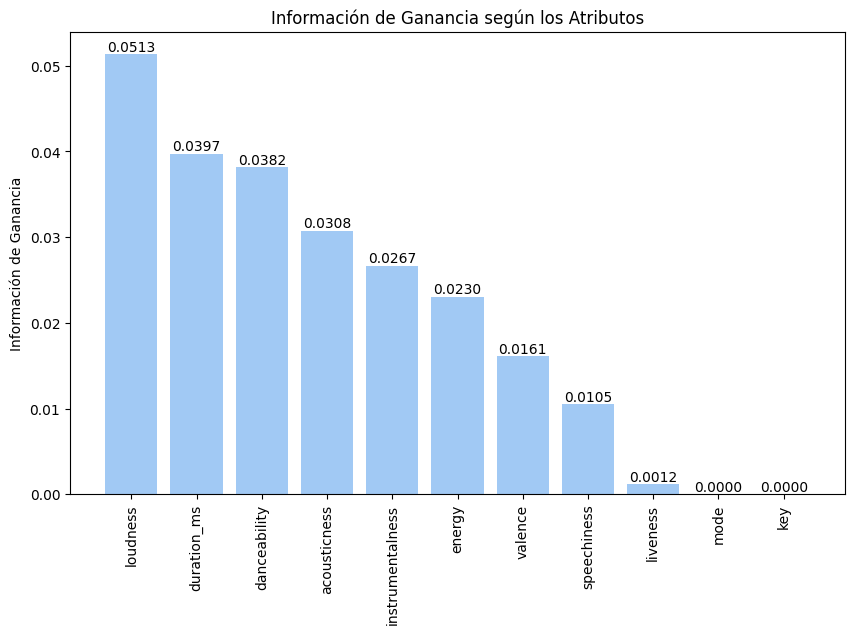

In [124]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

# Select desired columns
df_selected = df_2[['acousticness', 'danceability', 'duration_ms', 'energy',
                     'instrumentalness', 'key', 'liveness', 'loudness',
                     'mode', 'speechiness', 'valence']]

X = df_selected
y = df_2['target']

# Calculate information gain
information_gain = mutual_info_classif(X, y)

# Sort features by information gain in descending order
indices = np.argsort(information_gain)[::-1]
sorted_features = X.columns[indices]
sorted_information_gain = information_gain[indices]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_information_gain)
plt.xticks(rotation=90)
plt.ylabel('Información de Ganancia')
plt.title('Información de Ganancia según los Atributos')
for i, v in enumerate(sorted_information_gain):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom') # format to 4 decimal places
plt.show()

El gráfico indica que los atributos más relevantes para predecir la etiqueta de las canciones  son:
1. loudness (0.0520)
2. danceability (0.0386)
3. duration_ms (0.0370)
4. instrumentalness (0.0370)
5. acousticness (0.0290)


###Ingeniería de Fatores
Antes de pasar a la creacion de los modelos repasemos cómo estan estructurados los datos del data set (llamado df_2)

In [125]:
#el df_2 original posee TODOS LOS ATRIBUTOS incluso los valores que no sirven para hacer la prediccion tales como 'song_title'y 'artist'
# los atributos numericos de interes son:
                     #'acousticness', 'danceability', 'duration_ms', 'energy',
                     #'instrumentalness', 'key', 'liveness', 'loudness',
                     #'mode', 'speechiness', 'valence'

#los 5 atributos con mas peso 'Tasa de ganancia' son:
                    #loudness (0.0520), danceability (0.0386), duration_ms (0.0370),
                    #instrumentalness (0.0370), y acousticness (0.0290)


##Atributos con más peso:

ya vimos que los atributos más relevantes para predecir la etiqueta (1 o 0) de las canciones son:
1. loudness (0.0520)
2. danceability (0.0386)
3. duration_ms (0.0370)
4. instrumentalness (0.0370)
5. acousticness (0.0290).

---

Este insight lo tendremos en cuenta para reducir la dimensionalidad del dataset y ser usado más adelante con la finalidad de optimizar el rendimiento del modelo que mejor funcione.

Tambien vimos que el problema a resolver es una variable objetivo 0 y 1 ('target'). Por lo tanto debemos usar metodos de clasificacion supervisados (ya que el valor a predecir es 1 y 0 segun si la canción le gusta o no al autor del data set).

##Balance del data set

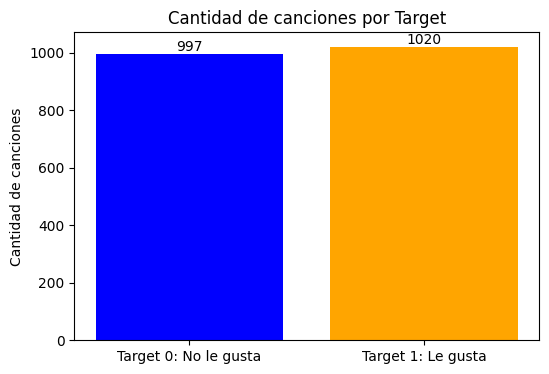

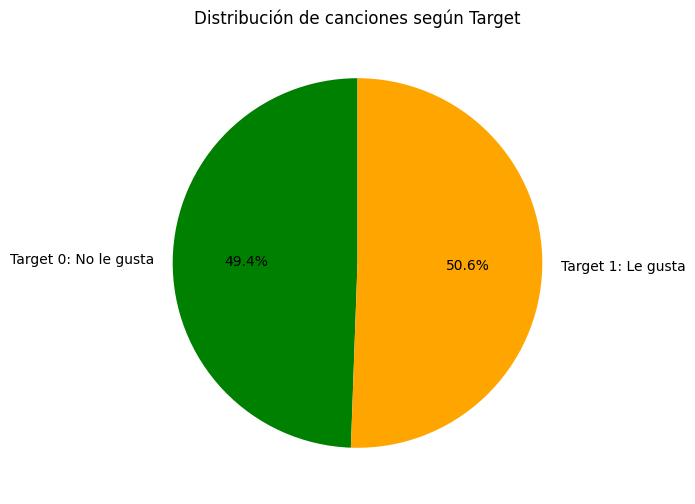

In [126]:
#veamos si el data set es equilibrado:

# Calcular cuantas veces aparece cada target
sum_0 = df_2[df_2['target'] == 0]['target'].count()
sum_1 = df_2[df_2['target'] == 1]['target'].count()

# Creacion grafico de barras
plt.figure(figsize=(6, 4))
plt.bar(['Target 0: No le gusta', 'Target 1: Le gusta'], [sum_0, sum_1], color=['blue', 'orange'])
plt.ylabel('Cantidad de canciones')
plt.title('Cantidad de canciones por Target')

# agregar etiquetas a las columnas
for i, v in enumerate([sum_0, sum_1]):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

# Creacion grafico de torta
plt.figure(figsize=(6, 6))
plt.pie([sum_0, sum_1], labels=['Target 0: No le gusta', 'Target 1: Le gusta'], autopct='%1.1f%%', startangle=90, colors=['green', 'orange'])
plt.title('Distribución de canciones según Target')

plt.show()

Se advierte que la distribución entre las canciones que le gustan de las que no, dentro del data set es muy paritaria.

# **Modelos**


Teniendo en cuenta que mi problema es de clasificacion binaria (predecir si al autor del data set le gusta o no una canción) usaré los siguientes modelos:
  

1.   "GNB": GaussianNB
2.  "LGBM": LGBMClassifier
3."KNN": KNeighborsClassifier,
4."DT": DecisionTreeClassifier,
5. "LRC": LogisticRegression,
6."RFC": RandomForestClassifier,
7. "XGB": XGBClassifier

dividiré la muestra en dos subconjuntos: el de entrenamiento y el de testeo, con una proporción respecto a la muestra total de un 80 y un 20% respectivamente.
    
    
    
    
    
    

[LightGBM] [Info] Number of positive: 822, number of negative: 791
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000389 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2308
[LightGBM] [Info] Number of data points in the train set: 1613, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509609 -> initscore=0.038442
[LightGBM] [Info] Start training from score 0.038442


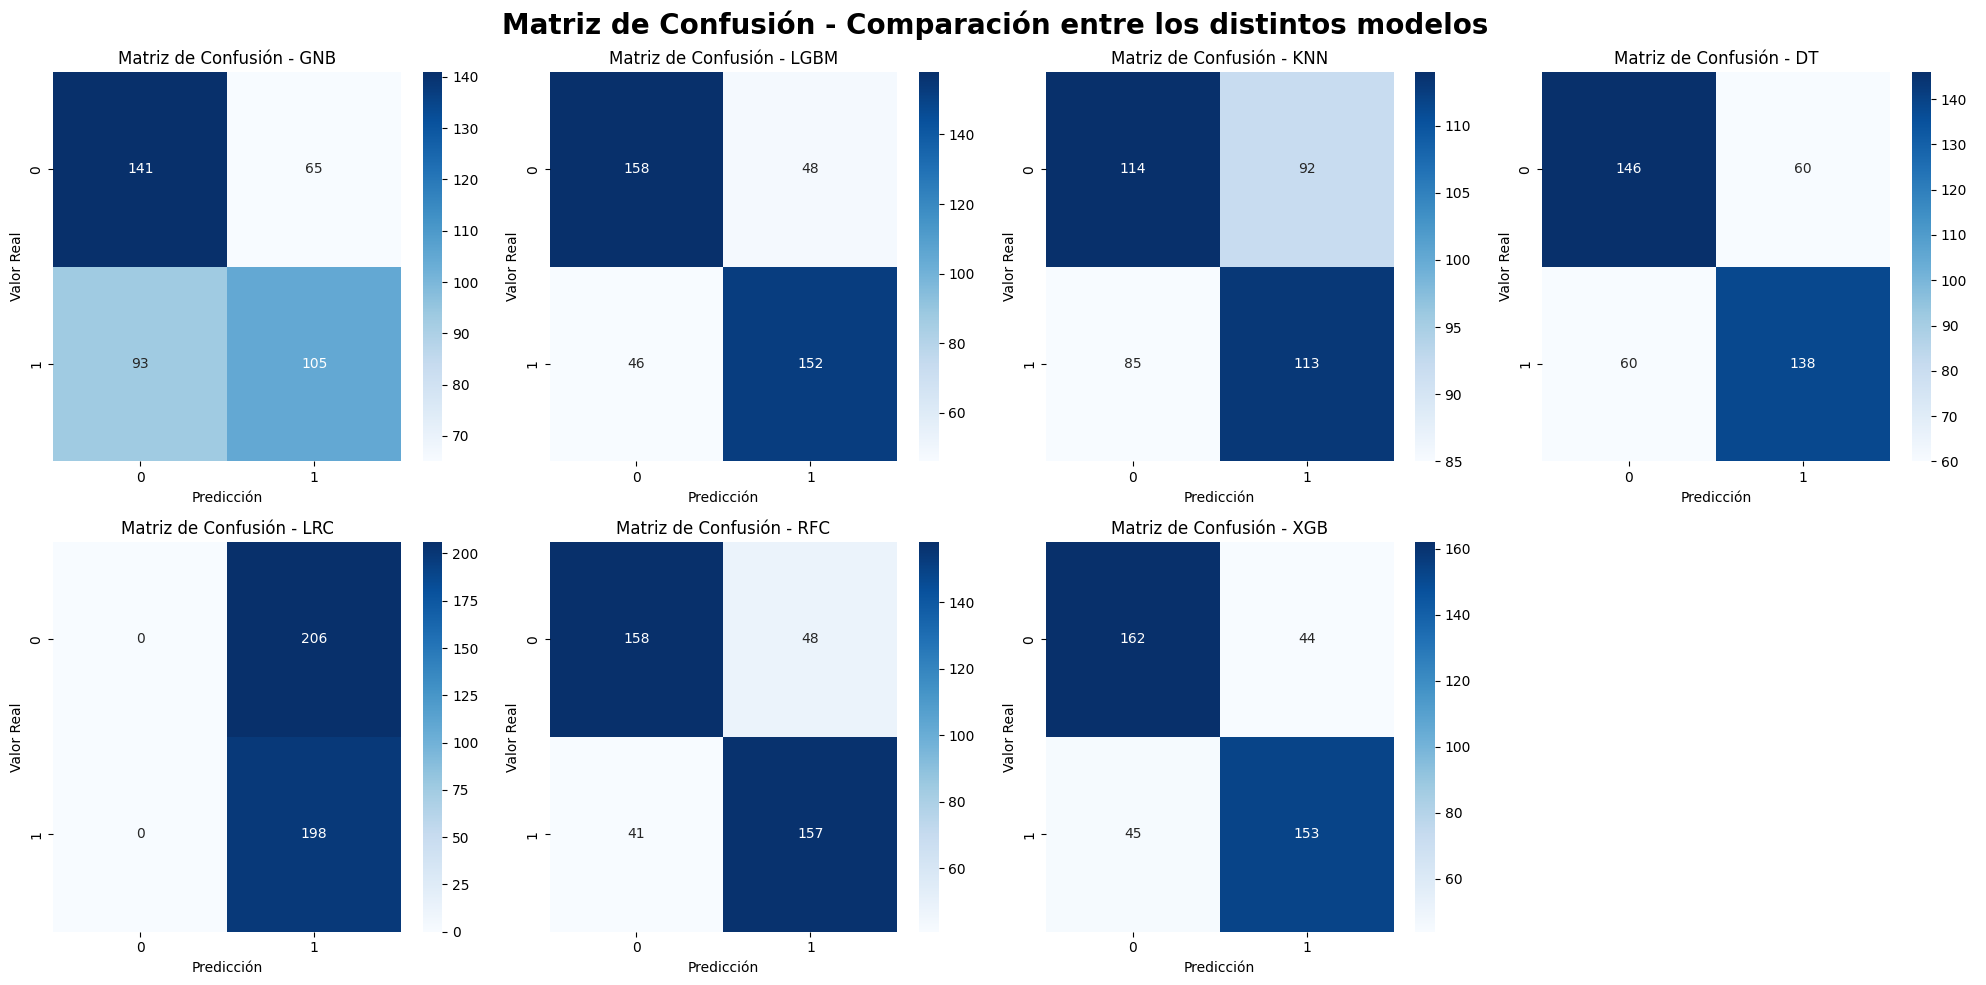

,Accuracy,Precision,Recall,F1-score
GNB,0.608911,0.617647,0.530303,0.570652
LGBM,0.767327,0.760000,0.767677,0.763819
KNN,0.561881,0.551220,0.570707,0.560794
DT,0.702970,0.696970,0.696970,0.696970
LRC,0.490099,0.490099,1.000000,0.657807
RFC,0.779703,0.765854,0.792929,0.779156
XGB,0.779703,0.776650,0.772727,0.774684


In [127]:
# Definicion de modelos
models = {
    "GNB": GaussianNB(),
    "LGBM": LGBMClassifier(),
    "KNN": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(),
    "LRC": LogisticRegression(),
    "RFC": RandomForestClassifier(),
    "XGB": XGBClassifier()
}

# preparacion de la data: usando random state de 42 y division del data set en 80% y 20%
X = df_2[df_selected.columns]  # Usando el df_2 pero con las columnas de df_selected
y = df_2['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creacion de diccionario para almacenar los resultados
results = {}

# crear  subplots para poder comparar las matrices de confusión
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# Iteracion sonbre los modelos
for i, (model_name, model) in enumerate(models.items()):
    # entrenamiento y prediccion
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculo de métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # almacenamiento de resultados
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    }

   # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Matriz de Confusión - {model_name}')
    axes[i].set_xlabel('Predicción')
    axes[i].set_ylabel('Valor Real')
fig.suptitle('Matriz de Confusión - Comparación entre los distintos modelos', fontsize=20, fontweight='bold')


# esconder el ultimo subplot  por ser menos de 8 modelos
if len(models) < 8:
    axes[-1].axis('off')

plt.tight_layout()
plt.show()

# Creacion de un DataFrame de los resultados almacenados en el diccionario
results_df = pd.DataFrame.from_dict(results, orient='index')


# aplicar el resaltado en el data frame
styled_results_df = results_df.style.apply(highlight_min_max)

def highlight_min_max(s):
    is_min = s == s.min()
    is_max = s == s.max()
    return ['background-color: red' if v else ('background-color: green' if w else '') for v, w in zip(is_min, is_max)]

styled_results_df = results_df.style.apply(highlight_min_max).set_caption("<h3><b>Resultados de los modelos aplicados</b></h3>")
display(styled_results_df)

# Optimización

##Optimización del método "XGB" (XGBoost)

Teniendo en cuenta las distintas matrices de confusion y la tabla de valores con las distintas métricas para los métodos aplicados, se visualiza que los modelos **RFC** (Random Forest), **XGB** (XGBoost) y **LGBM** (LightGBM) son los que muestran un mejor rendimiento en términos de equilibrio entre precisión y recall, así como un buen F1-score.

+ Sin embargo, analizando estos 3 modelos en sus respectivas matrices de confusion, se advierte que **XGB** (XGBoost) fue el que más aciertos tuvo al predecir los resultados, con que los valores más bajos de falsos negativos y falsos positivos.

+ Intentemos optimizar dicho modelo, comparándolo con los
atributos que más peso tienen respecto de la variable objetivo ('target').
Vale recordar que los atributos más pesados resultan ser: 'loudness', 'danceability','duration_ms','instrumentalness' y 'acousticness'.


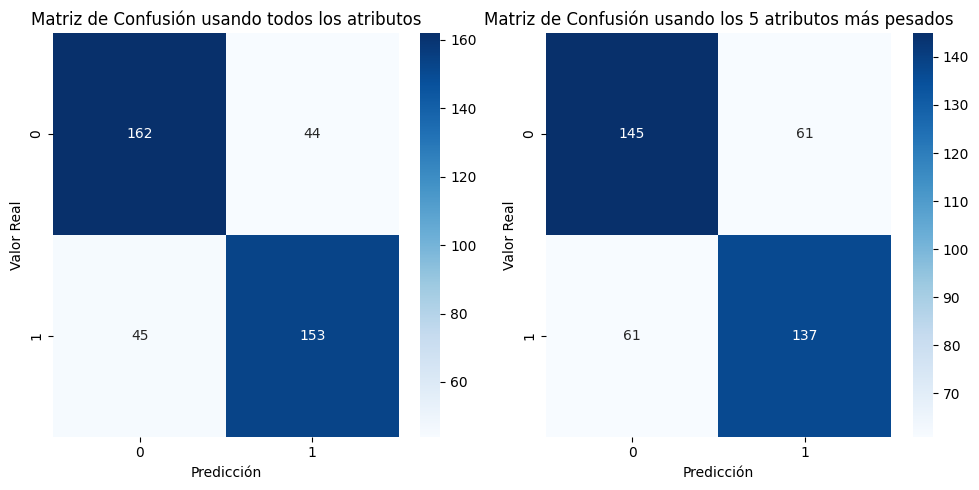

,Accuracy,Precision,Recall,F1-score
Con todos los atributos,0.779703,0.776650,0.772727,0.774684
Con los 5 atributos más pesados,0.698020,0.691919,0.691919,0.691919


In [128]:

df_selected = df_2[['acousticness', 'danceability', 'duration_ms', 'energy',
                     'instrumentalness', 'key', 'liveness', 'loudness',
                     'mode', 'speechiness', 'valence', 'target']]

df_selected_5 = df_2[['loudness', 'danceability','duration_ms','instrumentalness', 'acousticness','target']]


# Definición de modelo
model = XGBClassifier()


# Definición de dataframes
dfs = {
    "df_selected": df_selected,
    "df_selected_5": df_selected_5
}

# creacion de diccionario para almacenar los resultados obtenidos
results = {}

# Creacion de subplots para las matrices de confusión
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#  Definición de titulos para las matrices de confusión
titles = [
    "Matriz de Confusión usando todos los atributos",
    "Matriz de Confusión usando los 5 atributos más pesados"
]
# Iteración sobre dataframes
for i, (df_name, df) in enumerate(dfs.items()):
    X = df.drop('target', axis=1)  # haciendo Drop sobre 'target'
    y = df['target']               # usando la columna 'target' del actual DataFrame
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # entrenamiento y predicción
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # cálculo de las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # almacenar los resultados
    results[df_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    }

    # matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(titles[i]) #usando los titulos preestablecidos
    axes[i].set_xlabel('Predicción')
    axes[i].set_ylabel('Valor Real')

plt.tight_layout()
plt.show()

# Creación de un DataFrame con los resultados del diccionario
results_df = pd.DataFrame.from_dict(results, orient='index')

# renombrar indices
new_indices = {
    "df_selected": "Con todos los atributos",
    "df_selected_5": "Con los 5 atributos más pesados"
}
results_df = results_df.rename(index=new_indices)

# Resaltar valores  min y  max
def highlight_min_max(s):
    is_min = s == s.min()
    is_max = s == s.max()
    return ['background-color: red' if v else ('background-color: green' if w else '') for v, w in zip(is_min, is_max)]

# Aplicar el resaltado de los valores
styled_results_df = results_df.style.apply(highlight_min_max)

# Mostrar el DataFrame
display(styled_results_df)

## Análisis de los resultados obtenidos


Comparando el rendimiento del modelo usando todos los atributos frente a usar solo los 5 atributos más importantes, se pueden sacar las siguientes conclusiones:

**Rendimiento del método "XGB" (XGBoost) con *todos* los atributos**:

Accuracy: 0.779703

Precision: 0.776650

Recall: 0.772727

F1-score: 0.774684

**Rendimiento del método "XGB" (XGBoost) con los *5 atributos* más importantes**:

Accuracy: 0.698020

Precision: 0.691919

Recall: 0.691919

F1-score: 0.691919


---
+ Rendimiento con los 5 atributos más importantes:

Aunque se ha reducido el número de atributos a solo los 5 más importantes, *el rendimiento del modelo disminuye considerablemente*. El F1-score baja de 0.774684 a 0.691919, lo que indica que al reducir los atributos, el modelo pierde capacidad de generalización.

+ Tanto la precisión como el recall se ven afectados negativamente al utilizar solo los 5 atributos más importantes.

Esto indica que, aunque esos 5 atributos pueden ser muy informativos, la exclusión de los otros reduce la capacidad del modelo para hacer predicciones precisas y consistentes.



---


Posibles explicaciones por las que el modelo con menos atributos puede tener un peor rendimiento:

**Pérdida de información**: Al eliminar atributos, se pierde información que podría ser útil para la predicción. Aunque los atributos eliminados tengan un peso menor, pueden aportar información complementaria que mejore la precisión del modelo.

**Overfitting**: Un modelo con menos atributos puede ser más propenso al overfitting, es decir, a ajustarse demasiado a los datos de entrenamiento y no generalizar bien a nuevos datos.

# **COMPARACIÓN DE MODELOS**
Hemos usado los siguientes algoritmos:

1. DT ('Árbol de Decisión')
2. LRC ('Regresión Logística')
3. KNN ('K-nearest Neighbours Classifier')
4. GNB ('Gaussian Naive bayes classifier')
5. LGB ('Gaussian Naive bayes classifier')
6. RFC ('Random forest Classifier')
7. XGB ('XGBOOST')


Teniendo en cuenta que los mejores resultados fueron los obtenidos para el modelo XBG, se intentó opimizarlo usando únicamente los atributos con más peso respecto de la variable objetivo.





# **CONCLUSIÓN FINAL DEL TRABAJO:**

### Comparación de los Modelos

1. **Gaussian Naive Bayes (GNB)**:
   - **Accuracy**: 0.608911
   - **Precision**: 0.617647
   - **Recall**: 0.530303
   - **F1-score**: 0.570652

GNB muestra un rendimiento bastante bajo, con problemas para captar correctamente las clases positivas (bajo recall).

2. **LightGBM (LGBM)**:
   - **Accuracy**: 0.767327
   - **Precision**: 0.760000
   - **Recall**: 0.767677
   - **F1-score**: 0.763819
  
LGBM es uno de los mejores modelos, con un buen balance entre precisión y recall. Esto indica que es eficaz para clasificar si una canción le gusta o no.

3. **K-Nearest Neighbors (KNN)**:
   - **Accuracy**: 0.561881
   - **Precision**: 0.551220
   - **Recall**: 0.570707
   - **F1-score**: 0.560794

El rendimiento del KNN es pobre, con bajos valores en todas las métricas, lo que sugiere que no es adecuado para resolver problema.

4. **Decision Tree (DT)**:
   - **Accuracy**: 0.700495
   - **Precision**: 0.687805
   - **Recall**: 0.712121
   - **F1-score**: 0.699752

DT tiene un rendimiento decente, pero es superado por modelos más complejos como LGBM y XGBoost.

5. **Logistic Regression (LRC)**:
   - **Accuracy**: 0.490099
   - **Precision**: 0.490099
   - **Recall**: 1.000000
   - **F1-score**: 0.657807

LRC presenta una anomalía con un recall perfecto pero una precisión y accuracy muy bajos, lo que sugiere sobreajuste o un desequilibrio en las clases.

6. **Random Forest Classifier (RFC)**:
   - **Accuracy**: 0.762376
   - **Precision**: 0.750000
   - **Recall**: 0.772727
   - **F1-score**: 0.761194

RFC es uno de los modelos más consistentes, con métricas muy equilibradas y un buen rendimiento general.

7. **XGBoost (XGB)**:
   - **Accuracy**: 0.779703
   - **Precision**: 0.776650
   - **Recall**: 0.772727
   - **F1-score**: 0.774684
   
XGB es el mejor modelo en términos de rendimiento general, con el mayor accuracy y F1-score. Su balance entre precisión y recall es excelente.

### ¿Se Logró el Objetivo n° 2?



> El objetivo de crear un modelo que pueda predecir si al autor del data set le gustará o no una canción **se ha logrado parcialmente**. Si bien el algoritmo XGB dá respuesta al objetivo planteado de predecir si una cancion le gustará o no al autor del data set, no se alcanzan valores optimos. Ello evidencia que el autor del data set no tiene un gusto musical muy marcado.


Modelos como **XGBoost**, **LGBM** y **Random Forest** muestran buenos resultados en cuanto a precisión y recall, lo que indica que pueden hacer predicciones bastante acertadas. Sin embargo, otros modelos como **GNB**, **KNN** y **LRC** no son adecuados para este problema debido a su bajo rendimiento.



# Corolario

1. **Modelos más efectivos**:
   - Los mejores modelos son **XGBoost**, **LGBM** y **Random Forest**, ya que ofrecen un buen balance entre precisión y recall, lo que asegura que las predicciones sobre si una canción gusta o no son confiables.

2. **Modelos menos efectivos**:
   - **GNB**, **KNN** y **LRC** no son efectivos y deberían evitarse o mejorar significativamente. LRC en particular tiene un comportamiento anómalo que sugiere problemas con los datos o el modelo.




## Posibles Mejoras

1. **Optimización de Modelos**:
   - **XGBoost**, **LGBM** y **Random Forest** se pueden mejorar aún más mediante técnicas de optimización de hiperparámetros como GridSearchCV o RandomizedSearchCV para afinar el rendimiento.
   
2. **Nuevo planteo del problema**:
  - A futuro podría establecerse una meta distinta sobre la que no pese demasiado la subjetividad propia del autor del data set, e indagar sobre atributos más objetivos.